In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-12 18:12:52,550 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-12 18:12:52,551 - settings - Setting database.user to celiib
INFO - 2021-01-12 18:12:52,552 - settings - Setting database.password to newceliipass
INFO - 2021-01-12 18:12:52,556 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-12 18:12:52,557 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-12 18:12:52,568 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-12 18:12:52,813 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-12 18:12:52,845 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-12 18:12:52,846 - settings - Setting database.user to celiib
INFO - 2021-01-12 18:12:52,847 - settings - Setting database.password to newceliipass
INFO - 2021-01-12 18:12:52,850 - settings - Setting enable_python_native_blobs to True


Sleeping 3 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-12 18:12:53,123 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 5007


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7824282.380889241,3678098.820011452,27089.939,79.7,79.7,495.553,456.914,2130,0.00027222943860033875,11.513513513513514,3959944.957,71,0.0005378862643620327,30.0,217619006067.48697,59992605.27867258,27813.2863147961,54955.05832291976,3065056423.485732,1298.7173
864691135012398582,0,0.25,29.00,0,=BLOB=,1376990,2794781,0,4,1,4,2,9,331,129,13903026.646273784,4736919.313152046,24796.33,187.388,186.295,502.297,460.402,5205,0.0003743789127668123,15.725075528700906,8722973.997,175,0.0005967001623288228,29.743,911267911282.6133,94869445.23332134,65544.57057930235,104467.5716786518,5207245207.329219,2604.4532
864691135012471798,0,0.25,29.00,0,=BLOB=,879119,1793791,0,1,1,0,1,4,289,245,10545701.713406056,8374871.339385826,20318.51,101.514,101.514,478.023,425.897,2658,0.0002520458166023281,9.197231833910035,6162133.268,126,0.00043134412782063836,21.095,334671873701.14355,73603234.65274492,31735.382129735117,54311.041184243266,2656125981.7551074,3508.8503
864691135012571126,0,0.25,29.00,0,=BLOB=,1405952,2834699,0,5,5,0,1,9,439,190,15000091.889040658,5950211.886670216,22542.824,139.648,139.648,468.777,408.375,5404,0.0003602644597096276,12.309794988610479,8640395.253,216,0.0006254343512958735,25.019,976000132123.9475,107471073.68609047,65066.27688307904,112957.81078823611,4518519130.203461,4797.4468
864691135012905110,0,0.25,29.00,0,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9675627.15202663,3911641.696373985,24465.544,87.846,87.846,383.783,363.92,2135,0.00022065753118161535,8.50597609561753,5031174.543,95,0.00042435419040877436,22.474,388395999218.4453,100623801.14855957,40141.68726386827,77197.87812943809,4088378939.1415296,2073.6969
864691135065018692,0,0.25,29.00,0,=BLOB=,927599,1896021,0,1,1,1,2,19,273,62,10133780.765040418,2065336.4266345776,17535.369,109.943,109.943,546.409,539.932,2029,0.0002002214224921519,7.4322344322344325,5474214.867,121,0.00037064675926978005,16.769,269603278823.37152,70905449.51999664,26604.41202294909,49249

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)#.delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,75d0c425a0f308260b63627d20278b08,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,26749,31120,2021-01-12 12:11:49
__neuron_split_suggestions,9d8ae05fb49445938c99eaadb56e4ea9,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,26340,31116,2021-01-12 12:10:28
__neuron_split_suggestions,ca9e22c4b051002c2da706cb7f97982b,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,26880,31121,2021-01-12 12:12:32


INFO - 2021-01-12 18:12:53,262 - autopopulate - Found 78 keys to populate
INFO - 2021-01-12 18:12:53,292 - connection - Transaction started
INFO - 2021-01-12 18:12:53,294 - autopopulate - Populating: {'segment_id': 864691135775809197, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0}


Populate Started


----- Working on Neuron 864691135775809197-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0 5]
multi_touch_limbs = []


 -------- Working on limb 0------------
Starting combinations to process = [[23 31]]


---- working on disconnecting 23 and 31
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [23, 26, 32, 30, 31]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 8 22 26 30 32 33 34 35]
Short segments to combine = [32]


-------- Removing Segments -------------
curr_short_seg_revised = 32
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[782504.66666667 693756.58333333 643528.08333333]
 [782544.         694153.         642410.        ]]
new_stitch_point 

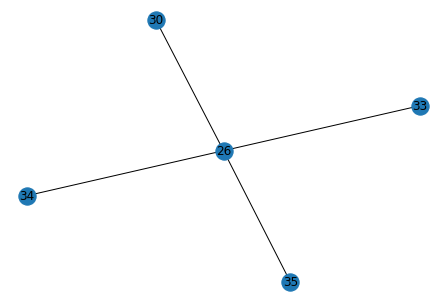

match_branches = [[30, 33]]
edges_to_delete (resolve crossover) = [[26, 30], [26, 33], [26, 34], [26, 35], [30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
edges_to_create (resolve crossover) = [[30, 33]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 31 because skeletal distance was 1850.2902179374864 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[26, 30], [26, 33], [26, 34], [26, 35], [30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
edges_to_create = [[30, 33]]
Number of connected components = 5
Comp 0 = {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28}
Comp 1 = {0, 33, 7, 8, 30, 31}
Comp 2 = {34}
Comp 3 = {35, 36, 29}
Comp 4 = {32}
curr_limb_copy.deleted_edges = [[26, 30], [26, 33], [26, 34], [26, 35], [30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
curr_limb_copy.created_edges = [[30, 33]]
After get best cut: cut_edges = [[26, 30], [26, 33], [26, 34], [26, 35], [30, 34], [30, 35], [33, 34], [33, 35

  Edge: [0 5]: curr_angle = 63.54
  Edge: [5 3]: curr_angle = 131.51
  Edge: [3 1]: curr_angle = 87.59

Total time for doubling_back = 0.19279170036315918
There were 1 edges that passed doubling back threshold of 100
Winning edge [5 3] had a doubling back of 131.50883476944864
***inside resolve crossover!!!!****
coordinate_branches = [2, 3, 5]
2 = red
3 = aqua
5 = purple
Angle between 2 and 3 = 40.44 
Angle between 2 and 5 = 138.98 
Angle between 3 and 5 = 78.35 
Final Matches = []
matched_branches_revised = []
Original graph


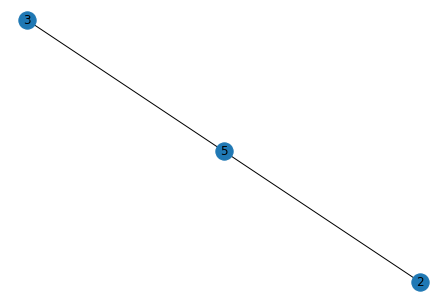

match_branches = []
edges_to_delete (resolve crossover) = [[2, 3], [2, 5], [3, 5]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([2, 3]), array([2, 5]), array([3, 5])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 5, 6}
Comp 1 = {2}
Comp 2 = {1, 3, 4}
curr_limb_copy.deleted_edges = [array([2, 3]), array([2, 5]), array([3, 5])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([2, 3]), array([2, 5]), array([3, 5])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([0, 5, 6]), array([2]), array([1, 3, 4])]


 ------ Total time for Splitting 864691135775809197 = 98.08097839355469 ------


----- Working on Neuron 86

  Edge: [37 30]: curr_angle = 21.64
  Edge: [30 24]: curr_angle = 29.52
  Edge: [24 25]: curr_angle = 31.38
  Edge: [25 26]: curr_angle = 31.8
  Edge: [26 29]: curr_angle = 2.23
  Edge: [29 31]: curr_angle = 47.59
  Edge: [31 43]: curr_angle = 59.66
  Edge: [43 34]: curr_angle = 16.41
  Edge: [34 48]: curr_angle = 38.82
  Edge: [48 39]: curr_angle = 44.3
  Edge: [39 35]: curr_angle = 19.27
  Edge: [35 32]: curr_angle = 29.6
  Edge: [32 33]: curr_angle = 31.24
  Edge: [33 42]: curr_angle = 23.3

Total time for doubling_back = 0.8842380046844482

Attempting the width jump check (attempting from both sides)
  Edge: [37 30]: jump = -118.88
  Edge: [30 24]: jump = -191.36
  Edge: [24 25]: jump = -133.13
  Edge: [25 26]: jump = -58.33
  Edge: [26 29]: jump = -167.25
  Edge: [29 31]: jump = -167.92
  Edge: [31 43]: jump = 23.64
  Edge: [43 34]: jump = 10.48
  Edge: [34 48]: jump = 9.38
  Edge: [48 39]: jump = 146.64
  Edge: [39 35]: jump = 303.43
Adding error edge [39 35] because width jump w

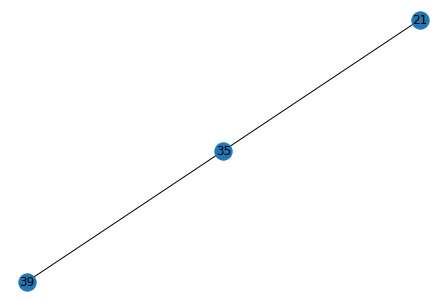

match_branches = [[35, 39]]
edges_to_delete (resolve crossover) = [[21, 35], [21, 39]]
edges_to_create (resolve crossover) = [[35, 39]]
Rejecting creating edge [35, 39] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([21, 35]), array([21, 39]), array([35, 39])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {32, 33, 35, 3, 40, 8, 42, 41, 44, 45, 47, 49, 50, 19, 51, 55, 56, 57, 27}
Comp 1 = {2, 7, 10, 12, 13, 14, 15, 16, 21}
Comp 2 = {0, 1, 4, 5, 6, 9, 11, 17, 18, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 34, 36, 37, 38, 39, 43, 46, 48, 52, 53, 54, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77}
curr_limb_copy.deleted_edges = [array([21, 35]), array([21, 39]), array([35, 39])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([21, 35]), array([21, 39]), array([35, 39])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 

  Edge: [37 30]: curr_angle = 21.64
  Edge: [30 24]: curr_angle = 29.52
  Edge: [24 25]: curr_angle = 31.38
  Edge: [25 26]: curr_angle = 31.8
  Edge: [26 29]: curr_angle = 2.23
  Edge: [29 31]: curr_angle = 47.59
  Edge: [31 43]: curr_angle = 59.66
  Edge: [43 36]: curr_angle = 76.03
  Edge: [36 61]: curr_angle = 16.52
  Edge: [61 59]: curr_angle = 8.65
  Edge: [59 69]: curr_angle = 11.34
  Edge: [69 63]: curr_angle = 24.17
  Edge: [63 64]: curr_angle = 34.65

Total time for doubling_back = 1.3481950759887695

Attempting the width jump check (attempting from both sides)
  Edge: [37 30]: jump = -118.88
  Edge: [30 24]: jump = -191.36
  Edge: [24 25]: jump = -133.13
  Edge: [25 26]: jump = -58.33
  Edge: [26 29]: jump = -167.25
  Edge: [29 31]: jump = -167.92
  Edge: [31 43]: jump = 23.64
  Edge: [43 36]: jump = -197.48
  Edge: [36 61]: jump = 51.51
  Edge: [61 59]: jump = 187.4
  Edge: [59 69]: jump = 99.06
  Edge: [69 63]: jump = 38.26
  Edge: [63 64]: jump = -43.3
Total time for widt

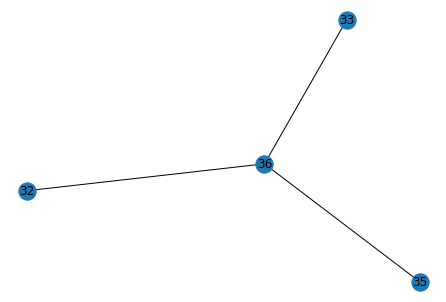

match_branches = [[33, 35], [32, 36]]
edges_to_delete (resolve crossover) = [[32, 33], [32, 35], [33, 36], [35, 36]]
edges_to_create (resolve crossover) = [[33, 35], [32, 36]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 42 because skeletal distance was 607.2065027934723 and threshold was 2500
skip_nodes = [42]
edges_to_delete (cut_limb_network) = [[32, 33], [32, 35], [33, 36], [35, 36]]
edges_to_create = [[33, 35], [32, 36]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 39}
Comp 2 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36]]
curr_limb_copy.created_edges = [[33, 35], [32, 36]]
After get best cut: cut_edges = [[32, 33], [32, 35], [33, 36], [35, 36]], added_edges = [[33, 35], [32, 36]]
total_so

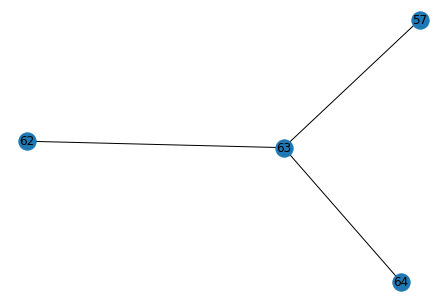

match_branches = [[62, 63], [57, 64]]
edges_to_delete (resolve crossover) = [[57, 62], [57, 63], [62, 64], [63, 64]]
edges_to_create (resolve crossover) = [[62, 63], [57, 64]]
curr_limb.deleted_edges 5 =[[32, 33], [32, 35], [33, 36], [35, 36]]
Skipping endnode 42 because skeletal distance was 607.2065027934723 and threshold was 2500
skip_nodes = [42]
edges_to_delete (cut_limb_network) = [[57, 62], [57, 63], [62, 64], [63, 64]]
edges_to_create = [[62, 63], [57, 64]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 40, 41, 42, 45, 48, 49, 51, 55, 58, 59, 60, 61, 62, 63, 65, 66}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 39}
Comp 2 = {64, 67, 43, 44, 46, 47, 50, 52, 53, 54, 56, 57}
Comp 3 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64]]
curr_limb_copy.created_edges = [[33, 35], [32, 36], [62, 63], [57, 64]]
After get

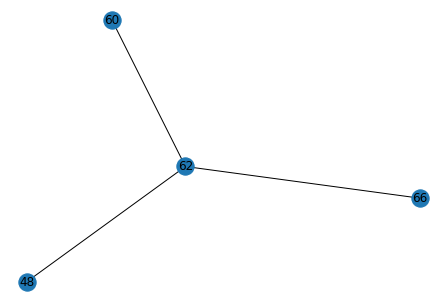

match_branches = [[60, 66]]
edges_to_delete (resolve crossover) = [[48, 60], [48, 62], [48, 66], [60, 62], [62, 66]]
edges_to_create (resolve crossover) = [[60, 66]]
curr_limb.deleted_edges 5 =[[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64]]
Skipping endnode 42 because skeletal distance was 607.2065027934723 and threshold was 2500
skip_nodes = [42]
edges_to_delete (cut_limb_network) = [[48, 60], [48, 62], [48, 66], [60, 62], [62, 66]]
edges_to_create = [[60, 66]]
Number of connected components = 6
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 40, 41, 42, 45, 49, 51, 58, 59, 62, 63, 65}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 39}
Comp 2 = {64, 67, 43, 44, 46, 47, 50, 52, 53, 54, 56, 57}
Comp 3 = {48}
Comp 4 = {66, 60, 61, 55}
Comp 5 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64], [48, 60], [48, 62], [48, 66], [

  Edge: [11  7]: curr_angle = 124.49
  Edge: [7 8]: curr_angle = 79.75
  Edge: [ 8 17]: curr_angle = 82.08
  Edge: [17 14]: curr_angle = 13.79
  Edge: [14 15]: curr_angle = 41.81

Total time for doubling_back = 0.1772782802581787
There were 1 edges that passed doubling back threshold of 100
Winning edge [11  7] had a doubling back of 124.4947667302454
***inside resolve crossover!!!!****
coordinate_branches = [5, 7, 11]
5 = red
7 = aqua
11 = purple
Angle between 5 and 7 = 68.94 
Angle between 5 and 11 = 30.67 
Angle between 7 and 11 = 118.91 
Final Matches = [[5, 11]]
matched_branches_revised = [[5, 11]]
Original graph


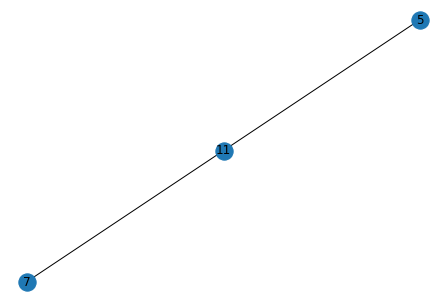

match_branches = [[5, 11]]
edges_to_delete (resolve crossover) = [[5, 7], [7, 11]]
edges_to_create (resolve crossover) = [[5, 11]]
edges_to_delete (cut_limb_network) = [array([5, 7]), array([ 7, 11])]
edges_to_create = [[5, 11]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18}
Comp 1 = {11, 5}
curr_limb_copy.deleted_edges = [array([5, 7]), array([ 7, 11])]
curr_limb_copy.created_edges = [[5, 11]]
After get best cut: cut_edges = [array([5, 7]), array([ 7, 11])], added_edges = [[5, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18]), array([11,  5])]


 ------ Total time for Splitting 8646

  Edge: [27 28]: curr_angle = 26.81
  Edge: [28 29]: curr_angle = 17.59
  Edge: [29 22]: curr_angle = 7.72
  Edge: [22 23]: curr_angle = 19.59
  Edge: [23 12]: curr_angle = 17.66
  Edge: [12 10]: curr_angle = 40.94
  Edge: [10  9]: curr_angle = 32.92
  Edge: [ 9 16]: curr_angle = 8.23
  Edge: [16 20]: curr_angle = 25.57
  Edge: [20 37]: curr_angle = 42.96
  Edge: [37 46]: curr_angle = 41.89
  Edge: [46 49]: curr_angle = 11.46
  Edge: [49 48]: curr_angle = 9.2
  Edge: [48 53]: curr_angle = 29.39
  Edge: [53 54]: curr_angle = 60.19
  Edge: [54 50]: curr_angle = 13.0

Total time for doubling_back = 1.10829496383667

Attempting the width jump check (attempting from both sides)
  Edge: [27 28]: jump = -254.59
  Edge: [28 29]: jump = -157.73
  Edge: [29 22]: jump = -49.51
  Edge: [22 23]: jump = -45.54
  Edge: [23 12]: jump = -16.85
  Edge: [12 10]: jump = -76.91
  Edge: [10  9]: jump = -4.09
  Edge: [ 9 16]: jump = -36.23
  Edge: [16 20]: jump = -206.11
  Edge: [20 37]: jump = 198.68
  Edge

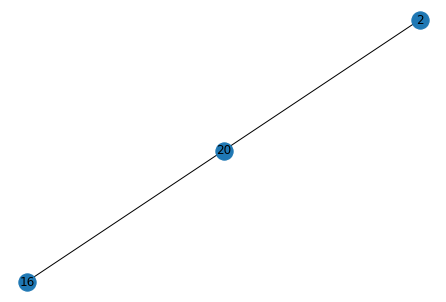

match_branches = []
edges_to_delete (resolve crossover) = [[2, 16], [2, 20], [16, 20]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([ 2, 16]), array([ 2, 20]), array([16, 20])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 39}
Comp 1 = {2}
Comp 2 = {11, 18, 20, 21, 34, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}
curr_limb_copy.deleted_edges = [array([ 2, 16]), array([ 2, 20]), array([16, 20])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([ 2, 16]), array([ 2, 20]), array([16, 20])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER 

  Edge: [6 7]: curr_angle = 65.57
  Edge: [ 7 18]: curr_angle = 29.61
  Edge: [18 20]: curr_angle = 55.1
  Edge: [20 22]: curr_angle = 21.12
  Edge: [22 24]: curr_angle = 51.47

Total time for doubling_back = 1.099325180053711

Attempting the width jump check (attempting from both sides)
  Edge: [6 7]: jump = 29.76
  Edge: [ 7 18]: jump = 90.73
  Edge: [18 20]: jump = 290.74
Adding error edge [18 20] because width jump was 290.73615843585674
  Edge: [20 22]: jump = -168.27
  Edge: [22 24]: jump = 298.34
Adding error edge [22 24] because width jump was 298.3359625399078
Total time for width = 0.9810590744018555
Path starting at 6 had err_edges: [[18, 20], [22, 24]]
  Edge: [24 22]: jump = -298.34
  Edge: [22 20]: jump = 168.27
  Edge: [20 18]: jump = -290.74
  Edge: [18  7]: jump = -90.73
  Edge: [7 6]: jump = -29.76
Total time for width = 0.7908623218536377
Path starting at 24 had err_edges: []
first_error_sizes = [290.73615843585674, -inf], winning_path = 0
***inside resolve crossover

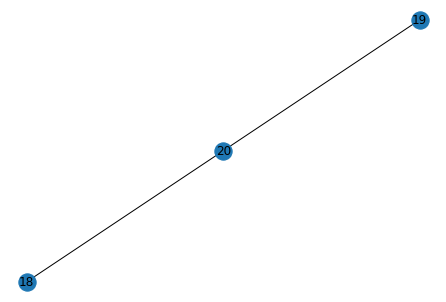

match_branches = []
edges_to_delete (resolve crossover) = [[18, 19], [18, 20], [19, 20]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([18, 19]), array([18, 20]), array([19, 20])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {6, 7, 8, 14, 18}
Comp 1 = {0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 15, 16, 17, 19, 21}
Comp 2 = {20, 22, 23, 24, 25}
curr_limb_copy.deleted_edges = [array([18, 19]), array([18, 20]), array([19, 20])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([18, 19]), array([18, 20]), array([19, 20])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 6,  7,  8, 14, 18]), array([ 0,  1,  2,  3,  4,  5, 

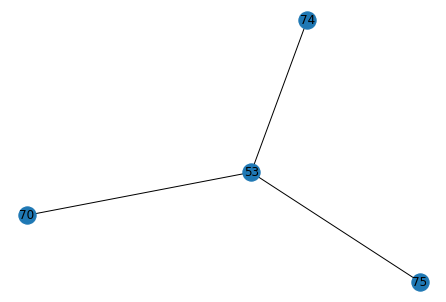

match_branches = [[53, 75], [70, 74]]
edges_to_delete (resolve crossover) = [[53, 70], [53, 74], [70, 75], [74, 75]]
edges_to_create (resolve crossover) = [[53, 75], [70, 74]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[53, 70], [53, 74], [70, 75], [74, 75]]
edges_to_create = [[53, 75], [70, 74]]
Number of connected components = 2
Comp 0 = {37, 44, 45, 46, 54, 55, 58, 59, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35.0, 36, 38, 39, 40, 41, 42, 43, 47, 48, 49, 50, 51, 52, 53, 56, 57, 60, 64, 69, 75, 77, 78}
curr_limb_copy.deleted_edges = [[53, 70], [53, 74], [70, 75], [74, 75]]
curr_limb_copy.created_edges = [[53, 75], [70, 74]]
After get best cut: cut_edges = [[53, 70], [53, 74], [70, 75], [74, 75]], added_edges = [[53, 75], [70, 74]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 

  Edge: [32 30]: curr_angle = 31.84
  Edge: [30 36]: curr_angle = 61.65
  Edge: [36 53]: curr_angle = 20.96
  Edge: [53 75]: curr_angle = 12.72

Total time for doubling_back = 0.2711629867553711

Attempting the width jump check (attempting from both sides)
  Edge: [32 30]: jump = 64.09
  Edge: [30 36]: jump = -625.13
  Edge: [36 53]: jump = -134.78
  Edge: [53 75]: jump = -8.16
Total time for width = 0.24748706817626953
Path starting at 32 had err_edges: []
  Edge: [75 53]: jump = 8.16
  Edge: [53 36]: jump = 134.78
  Edge: [36 30]: jump = 625.13
Adding error edge [36 30] because width jump was 625.1324715725921
  Edge: [30 32]: jump = -64.09
Total time for width = 0.24380993843078613
Path starting at 75 had err_edges: [[36, 30]]
first_error_sizes = [-inf, 625.1324715725921], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [26, 30, 36]
26 = red
30 = aqua
36 = purple
Angle between 26 and 30 = 25.87 
Angle between 26 and 36 = 84.53 
Angle between 30 and 36 = 70

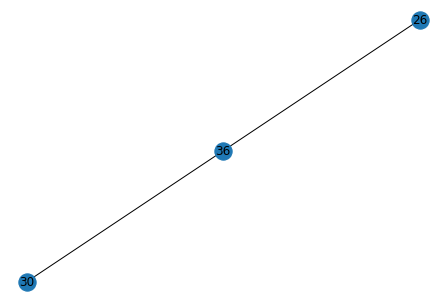

match_branches = [[26, 30]]
edges_to_delete (resolve crossover) = [[26, 36], [30, 36]]
edges_to_create (resolve crossover) = [[26, 30]]
edges_to_delete (cut_limb_network) = [array([26, 36]), array([30, 36])]
edges_to_create = [[26, 30]]
Number of connected components = 3
Comp 0 = {37, 44, 45, 46, 54, 55, 58, 59, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76}
Comp 1 = {49, 75, 36, 53}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35.0, 38, 39, 40, 41, 42, 43, 47, 48, 50, 51, 52, 56, 57, 60, 64, 69, 77, 78}
curr_limb_copy.deleted_edges = [[53, 70], [53, 74], [70, 75], [74, 75], array([26, 36]), array([30, 36])]
curr_limb_copy.created_edges = [[53, 75], [70, 74], [26, 30]]
After get best cut: cut_edges = [array([26, 36]), array([30, 36])], added_edges = [[26, 30]]
total_soma_paths_to_cut = [[53, 70], [53, 74], [70, 75], [74, 75]]
-----------counter = 1------------
 Cut iteration 2
Total numb

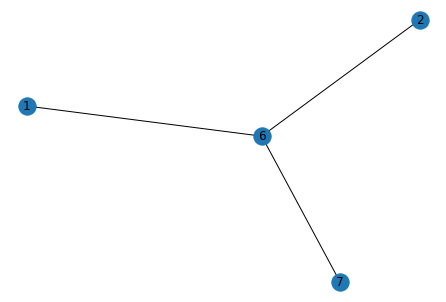

match_branches = [[1, 7]]
edges_to_delete (resolve crossover) = [[1, 2], [1, 6], [2, 6], [2, 7], [6, 7]]
edges_to_create (resolve crossover) = [[1, 7]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 2], [1, 6], [2, 6], [2, 7], [6, 7]]
edges_to_create = [[1, 7]]
Number of connected components = 4
Comp 0 = {1, 4, 7, 9, 10, 11, 20, 21, 24}
Comp 1 = {2}
Comp 2 = {0, 3, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 25, 26, 27, 28}
Comp 3 = {5}
curr_limb_copy.deleted_edges = [[1, 2], [1, 6], [2, 6], [2, 7], [6, 7]]
curr_limb_copy.created_edges = [[1, 7]]
After get best cut: cut_edges = [[1, 2], [1, 6], [2, 6], [2, 7], [6, 7]], added_edges = [[1, 7]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection
Total number of graphs at the end of t

  Edge: [16 14]: curr_angle = 44.51
  Edge: [14 13]: curr_angle = 29.55
  Edge: [13 19]: curr_angle = 21.21
  Edge: [19 21]: curr_angle = 27.94
  Edge: [21 22]: curr_angle = 36.95
  Edge: [22 25]: curr_angle = 11.31
  Edge: [25 24]: curr_angle = 28.8

Total time for doubling_back = 0.6546242237091064

Attempting the width jump check (attempting from both sides)
  Edge: [16 14]: jump = -161.43
  Edge: [14 13]: jump = 221.59
Adding error edge [14 13] because width jump was 221.59064864928413
  Edge: [13 19]: jump = -34.04
  Edge: [19 21]: jump = 168.89
  Edge: [21 22]: jump = 51.83
  Edge: [22 25]: jump = 29.07
  Edge: [25 24]: jump = 143.19
Total time for width = 0.5293178558349609
Path starting at 16 had err_edges: [[14, 13]]
  Edge: [24 25]: jump = -143.19
  Edge: [25 22]: jump = -29.07
  Edge: [22 21]: jump = -51.83
  Edge: [21 19]: jump = -168.89
  Edge: [19 13]: jump = 34.04
  Edge: [13 14]: jump = -221.59
  Edge: [14 16]: jump = 161.43
Total time for width = 0.5254547595977783
Pat

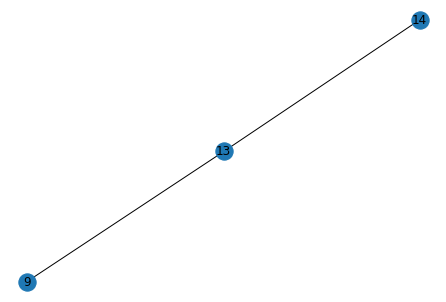

match_branches = [[9, 13]]
edges_to_delete (resolve crossover) = [[9, 14], [13, 14]]
edges_to_create (resolve crossover) = [[9, 13]]
edges_to_delete (cut_limb_network) = [array([ 9, 14]), array([13, 14])]
edges_to_create = [[9, 13]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}
Comp 1 = {3, 12, 14, 15, 16}
curr_limb_copy.deleted_edges = [array([ 9, 14]), array([13, 14])]
curr_limb_copy.created_edges = [[9, 13]]
After get best cut: cut_edges = [array([ 9, 14]), array([13, 14])], added_edges = [[9, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 13

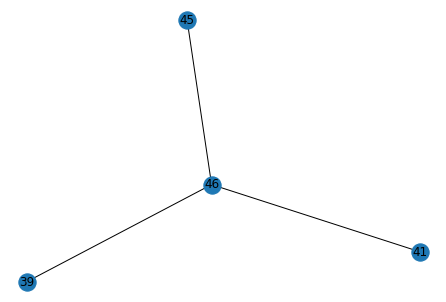

match_branches = [[39, 46]]
edges_to_delete (resolve crossover) = [[39, 41], [39, 45], [41, 45], [41, 46], [45, 46]]
edges_to_create (resolve crossover) = [[39, 46]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[39, 41], [39, 45], [41, 45], [41, 46], [45, 46]]
edges_to_create = [[39, 46]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {41}
Comp 2 = {45}
Comp 3 = {42}
curr_limb_copy.deleted_edges = [[39, 41], [39, 45], [41, 45], [41, 46], [45, 46]]
curr_limb_copy.created_edges = [[39, 46]]
After get best cut: cut_edges = [[39, 41], [39, 45], [41, 45], [41, 46], [45,

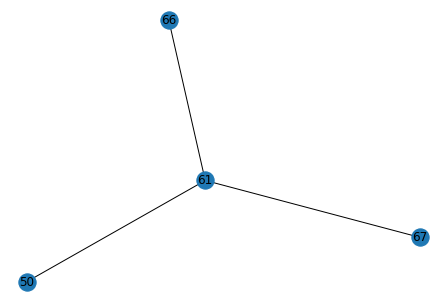

match_branches = [[61, 66], [50, 67]]
edges_to_delete (resolve crossover) = [[50, 61], [50, 66], [61, 67], [66, 67]]
edges_to_create (resolve crossover) = [[61, 66], [50, 67]]
curr_limb.deleted_edges 5 =[[39, 41], [39, 45], [41, 45], [41, 46], [45, 46]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[50, 61], [50, 66], [61, 67], [66, 67]]
edges_to_create = [[61, 66], [50, 67]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 43, 44, 47, 48, 51, 52, 53, 59, 60, 61, 62, 66, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {32, 64, 65, 67, 68, 69, 70, 39, 40, 72, 71, 46, 49, 50, 54, 55, 56, 57, 58, 63}
Comp 2 = {41}
Comp 3 = {45}
Comp 4 = {42}
curr_limb_copy.deleted_edges = [[39, 41], [39, 45], [41, 45], [41, 46], [45, 46], [50, 61], [50, 66], [61, 67], [66, 67]]
curr_limb_c

  Edge: [27 25]: curr_angle = 36.25
  Edge: [25 24]: curr_angle = 2.73
  Edge: [24 18]: curr_angle = 27.67
  Edge: [18 16]: curr_angle = 15.48
  Edge: [16 17]: curr_angle = 16.43
  Edge: [17 14]: curr_angle = 27.95
  Edge: [14 15]: curr_angle = 17.77
  Edge: [15 23]: curr_angle = 3.18
  Edge: [23 20]: curr_angle = 27.26
  Edge: [20 47]: curr_angle = 31.11
  Edge: [47 62]: curr_angle = 50.59
  Edge: [62 75]: curr_angle = 11.88
  Edge: [75 78]: curr_angle = 9.93
  Edge: [78 80]: curr_angle = 9.37
  Edge: [80 82]: curr_angle = 27.99
  Edge: [82 84]: curr_angle = 34.98

Total time for doubling_back = 1.4682550430297852

Attempting the width jump check (attempting from both sides)
  Edge: [27 25]: jump = -161.16
  Edge: [25 24]: jump = -72.83
  Edge: [24 18]: jump = 66.39
  Edge: [18 16]: jump = -74.41
  Edge: [16 17]: jump = -66.03
  Edge: [17 14]: jump = -30.12
  Edge: [14 15]: jump = -160.48
  Edge: [15 23]: jump = -95.85
  Edge: [23 20]: jump = -194.71
  Edge: [20 47]: jump = 167.93
  E

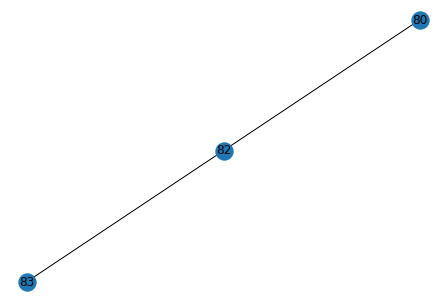

match_branches = [[80, 82]]
edges_to_delete (resolve crossover) = [[80, 83], [82, 83]]
edges_to_create (resolve crossover) = [[80, 82]]
Rejecting creating edge [80, 82] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([80, 82]), array([80, 83]), array([82, 83])]
edges_to_create = []
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 43, 44, 47, 48, 51, 52, 59, 60, 61, 62, 66, 75, 76, 78, 79, 80, 96, 97, 98, 99, 100}
Comp 1 = {32, 64, 65, 67, 68, 69, 70, 39, 40, 72, 71, 46, 49, 50, 54, 55, 56, 57, 58, 63}
Comp 2 = {41}
Comp 3 = {45}
Comp 4 = {34, 73, 74, 77, 81, 82, 84, 85, 86, 53, 88}
Comp 5 = {83, 87, 89, 90, 91, 92, 93, 94, 95}
Comp 6 = {42}
curr_limb_copy.deleted_edges = [[39, 41], [39, 45], [41, 45], [41, 46], [45, 46], [50, 61], [50, 66], [61, 67], [66, 67], array([80, 82]), array([80, 83]), array([82

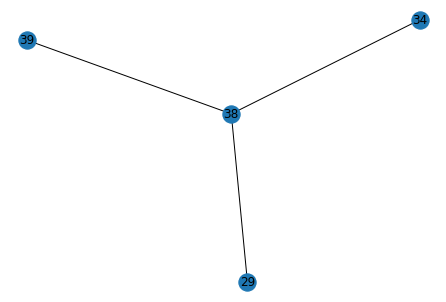

match_branches = [[34, 39], [29, 38]]
edges_to_delete (resolve crossover) = [[29, 34], [29, 39], [34, 38], [38, 39]]
edges_to_create (resolve crossover) = [[34, 39], [29, 38]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 40 because skeletal distance was 1276.184899599232 and threshold was 2500
skip_nodes = [40]
edges_to_delete (cut_limb_network) = [[29, 34], [29, 39], [34, 38], [38, 39]]
edges_to_create = [[34, 39], [29, 38]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 1

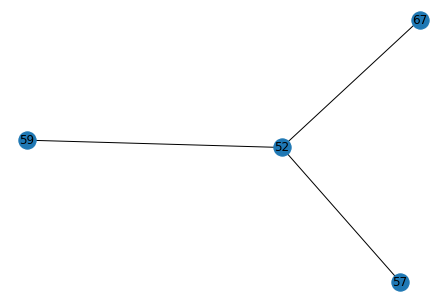

match_branches = [[52, 59]]
edges_to_delete (resolve crossover) = [[52, 57], [52, 67], [57, 59], [57, 67], [59, 67]]
edges_to_create (resolve crossover) = [[52, 59]]
curr_limb.deleted_edges 5 =[[29, 34], [29, 39], [34, 38], [38, 39]]
Skipping endnode 40 because skeletal distance was 1276.184899599232 and threshold was 2500
skip_nodes = [40]
edges_to_delete (cut_limb_network) = [[52, 57], [52, 67], [57, 59], [57, 67], [59, 67]]
edges_to_create = [[52, 59]]
Number of connected components = 9
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 66, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 86, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 100, 101, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130}
Comp 1 = {29, 38}
Comp 2 = {57

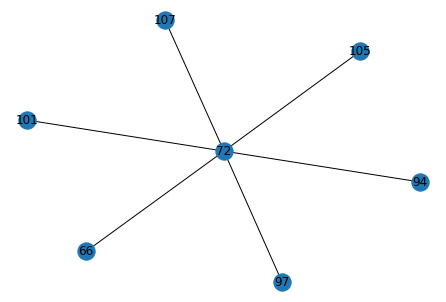

match_branches = [[72, 101]]
edges_to_delete (resolve crossover) = [[66, 72], [66, 94], [66, 97], [66, 101], [66, 105], [66, 107], [72, 94], [72, 97], [72, 105], [72, 107], [94, 97], [94, 101], [94, 105], [94, 107], [97, 101], [97, 105], [97, 107], [101, 105], [101, 107], [105, 107]]
edges_to_create (resolve crossover) = [[72, 101]]
curr_limb.deleted_edges 5 =[[29, 34], [29, 39], [34, 38], [38, 39], [52, 57], [52, 67], [57, 59], [57, 67], [59, 67]]
Skipping endnode 40 because skeletal distance was 1276.184899599232 and threshold was 2500
skip_nodes = [40]
edges_to_delete (cut_limb_network) = [[66, 72], [66, 94], [66, 97], [66, 101], [66, 105], [66, 107], [72, 94], [72, 97], [72, 105], [72, 107], [94, 97], [94, 101], [94, 105], [94, 107], [97, 101], [97, 105], [97, 107], [101, 105], [101, 107], [105, 107]]
edges_to_create = [[72, 101]]
Number of connected components = 14
Comp 0 = {2, 3, 5, 6, 9, 15, 20, 21, 22, 27, 32, 33, 34, 35, 36, 39, 40, 41, 45, 46, 48, 52, 53, 55, 59, 68, 69, 70, 

  Edge: [33 34]: curr_angle = 77.11
  Edge: [34 39]: curr_angle = 22.7
  Edge: [39 45]: curr_angle = 29.2
  Edge: [45 47]: curr_angle = 116.4
  Edge: [47 43]: curr_angle = 6.58
  Edge: [43 40]: curr_angle = 35.3

Total time for doubling_back = 0.3513357639312744
There were 1 edges that passed doubling back threshold of 100
Winning edge [45 47] had a doubling back of 116.39774140141806
***inside resolve crossover!!!!****
coordinate_branches = [45, 47, 48]
45 = red
47 = aqua
48 = purple
Angle between 45 and 47 = 85.98 
Angle between 45 and 48 = 79.54 
Angle between 47 and 48 = 18.55 
Final Matches = [[47, 48]]
matched_branches_revised = [[47, 48]]
Original graph


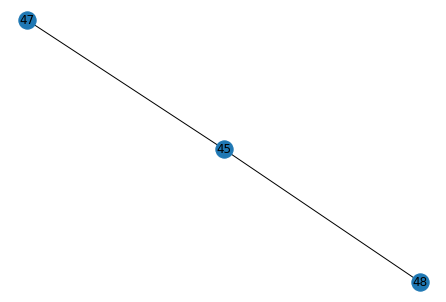

match_branches = [[47, 48]]
edges_to_delete (resolve crossover) = [[45, 47], [45, 48]]
edges_to_create (resolve crossover) = [[47, 48]]
edges_to_delete (cut_limb_network) = [array([45, 47]), array([45, 48])]
edges_to_create = [[47, 48]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 45}
Comp 1 = {35, 36, 40, 41, 42, 43, 44, 46, 47, 48}
curr_limb_copy.deleted_edges = [array([45, 47]), array([45, 48])]
curr_limb_copy.created_edges = [[47, 48]]
After get best cut: cut_edges = [array([45, 47]), array([45, 48])], added_edges = [[47, 48]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: 

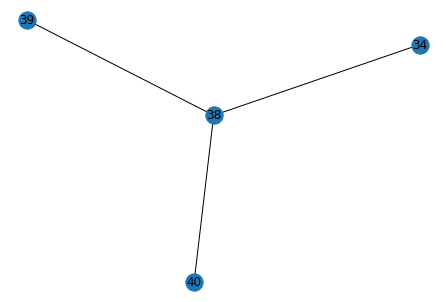

match_branches = [[38, 39], [34, 40]]
edges_to_delete (resolve crossover) = [[34, 38], [34, 39], [38, 40], [39, 40]]
edges_to_create (resolve crossover) = [[38, 39], [34, 40]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 37 because skeletal distance was 103.69111909410653 and threshold was 2500
Skipping endnode 40 because skeletal distance was 1493.6121084645433 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[34, 38], [34, 39], [38, 40], [39, 40]]
edges_to_create = [[38, 39], [34, 40]]
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11.0, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}
curr_limb_copy.deleted_edges = [[34, 38], [34, 39], [38, 40], [39, 40]]
curr_limb_copy.created_edges = [[38, 39], [34, 40]]
After get best cut: cut_edges = [[34, 38], [34, 39], [38, 40], [39, 40]], added_edges = [[38, 39]

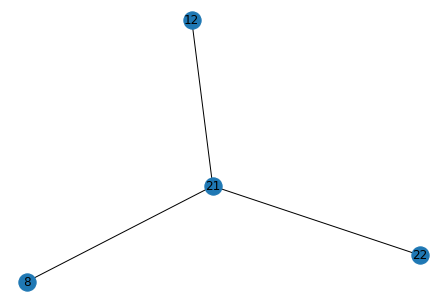

match_branches = [[8, 21]]
edges_to_delete (resolve crossover) = [[8, 12], [8, 22], [12, 21], [12, 22], [21, 22]]
edges_to_create (resolve crossover) = [[8, 21]]
curr_limb.deleted_edges 5 =[[34, 38], [34, 39], [38, 40], [39, 40]]
Skipping endnode 37 because skeletal distance was 103.69111909410653 and threshold was 2500
Skipping endnode 40 because skeletal distance was 1493.6121084645433 and threshold was 2500
skip_nodes = [37, 40]
edges_to_delete (cut_limb_network) = [[8, 12], [8, 22], [12, 21], [12, 22], [21, 22]]
edges_to_create = [[8, 21]]
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11.0, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}
curr_limb_copy.deleted_edges = [[34, 38], [34, 39], [38, 40], [39, 40], [8, 12], [8, 22], [12, 21], [12, 22], [21, 22]]
curr_limb_copy.created_edges = [[38, 39], [34, 40], [8, 21]]
After get best cut: cut_edges = [[8, 12], [8, 22], [12, 21], [12, 22

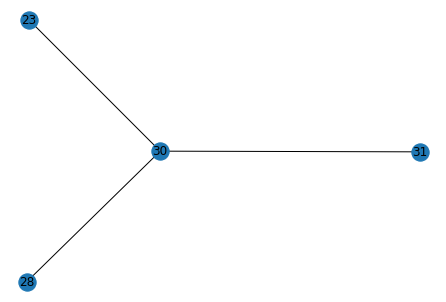

match_branches = [[28, 30]]
edges_to_delete (resolve crossover) = [[23, 28], [23, 30], [23, 31], [28, 31], [30, 31]]
edges_to_create (resolve crossover) = [[28, 30]]
curr_limb.deleted_edges 5 =[[34, 38], [34, 39], [38, 40], [39, 40], [8, 12], [8, 22], [12, 21], [12, 22], [21, 22]]
Skipping endnode 37 because skeletal distance was 103.69111909410653 and threshold was 2500
Skipping endnode 40 because skeletal distance was 1493.6121084645433 and threshold was 2500
skip_nodes = [37, 40]
edges_to_delete (cut_limb_network) = [[23, 28], [23, 30], [23, 31], [28, 31], [30, 31]]
edges_to_create = [[28, 30]]
Number of connected components = 4
Comp 0 = {32, 0, 34, 2, 5, 40, 9, 10, 11.0, 12, 14, 18, 22, 24, 26, 31}
Comp 1 = {1, 3, 4, 6, 7, 8, 13, 15, 16, 17, 19, 20, 21, 25, 27, 28, 30, 33, 35, 36, 37, 38, 39}
Comp 2 = {23}
Comp 3 = {29}
curr_limb_copy.deleted_edges = [[34, 38], [34, 39], [38, 40], [39, 40], [8, 12], [8, 22], [12, 21], [12, 22], [21, 22], [23, 28], [23, 30], [23, 31], [28, 31], [30,

  Edge: [11  7]: curr_angle = 14.82
  Edge: [7 6]: curr_angle = 49.55
  Edge: [6 2]: curr_angle = 14.42
  Edge: [2 3]: curr_angle = 127.96
  Edge: [ 3 12]: curr_angle = 39.93

Total time for doubling_back = 0.4375486373901367
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 3] had a doubling back of 127.96483030125374
***inside resolve crossover!!!!****
coordinate_branches = [1, 2, 3]
1 = red
2 = aqua
3 = purple
Angle between 1 and 2 = 73.74 
Angle between 1 and 3 = 34.46 
Angle between 2 and 3 = 112.12 
Final Matches = [[1, 3]]
matched_branches_revised = [[1, 3]]
Original graph


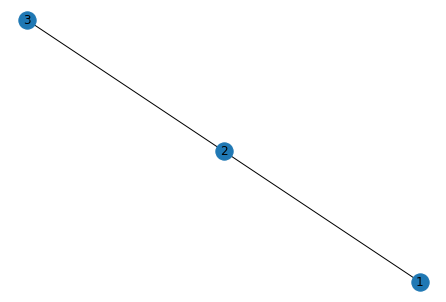

match_branches = [[1, 3]]
edges_to_delete (resolve crossover) = [[1, 2], [2, 3]]
edges_to_create (resolve crossover) = [[1, 3]]
edges_to_delete (cut_limb_network) = [array([1, 2]), array([2, 3])]
edges_to_create = [[1, 3]]
Number of connected components = 2
Comp 0 = {0, 2, 4, 5, 6, 7, 11}
Comp 1 = {1, 3, 8, 9, 10, 12, 13, 14}
curr_limb_copy.deleted_edges = [array([1, 2]), array([2, 3])]
curr_limb_copy.created_edges = [[1, 3]]
After get best cut: cut_edges = [array([1, 2]), array([2, 3])], added_edges = [[1, 3]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  2,  4,  5,  6,  7, 11]), array([ 1,  3,  8,  9, 10, 12, 13, 14])]


 ------ Total time for Splitting 864691135373436616 = 551.8479027748108 ------




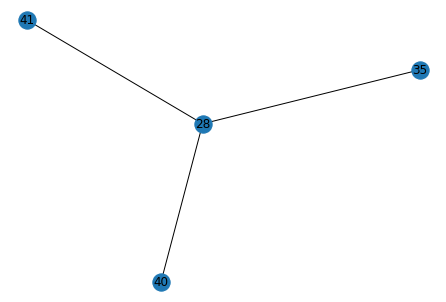

match_branches = [[28, 41], [35, 40]]
edges_to_delete (resolve crossover) = [[28, 35], [28, 40], [35, 41], [40, 41]]
edges_to_create (resolve crossover) = [[28, 41], [35, 40]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[28, 35], [28, 40], [35, 41], [40, 41]]
edges_to_create = [[28, 41], [35, 40]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 41}
Comp 1 = {9, 26, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}
Comp 2 = {37}
curr_limb_copy.deleted_edges = [[28, 35], [28, 40], [35, 41], [40, 41]]
curr_limb_copy.created_edges = [[28, 41], [35, 40]]
After get best cut: cut_edges = [[28, 35], [28, 40], [35, 41], [40, 41]], added_edges = [[28, 41], [35, 40]]
total_soma_paths_to_cut = []
-----------c

  Edge: [60 58]: curr_angle = 24.55
  Edge: [58 54]: curr_angle = 29.81
  Edge: [54 52]: curr_angle = 48.64
  Edge: [52 33]: curr_angle = 14.89
  Edge: [33 31]: curr_angle = 29.66
  Edge: [31 36]: curr_angle = 95.66
  Edge: [36 38]: curr_angle = 65.15
  Edge: [38 67]: curr_angle = 7.58
  Edge: [67 68]: curr_angle = 38.59
  Edge: [68 70]: curr_angle = 46.23

Total time for doubling_back = 1.550306797027588

Attempting the width jump check (attempting from both sides)
  Edge: [60 58]: jump = -110.6
  Edge: [58 54]: jump = 0.69
  Edge: [54 52]: jump = -84.9
  Edge: [52 33]: jump = -86.47
  Edge: [33 31]: jump = -28.95
  Edge: [31 36]: jump = 189.11
  Edge: [36 38]: jump = 76.41
  Edge: [38 67]: jump = 96.96
  Edge: [67 68]: jump = 60.17
  Edge: [68 70]: jump = 324.58
Adding error edge [68 70] because width jump was 324.5800569744727
Total time for width = 1.4023425579071045
Path starting at 60 had err_edges: [[68, 70]]
  Edge: [70 68]: jump = -324.58
  Edge: [68 67]: jump = -60.17
  Edge:

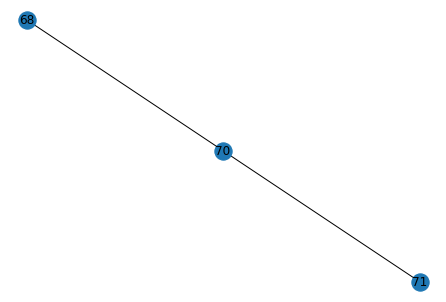

match_branches = []
edges_to_delete (resolve crossover) = [[68, 70], [68, 71], [70, 71]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([68, 70]), array([68, 71]), array([70, 71])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 41}
Comp 1 = {9, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 67, 68}
Comp 2 = {70}
Comp 3 = {65, 66, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 26, 63}
Comp 4 = {37}
curr_limb_copy.deleted_edges = [[28, 35], [28, 40], [35, 41], [40, 41], array([68, 70]), array([68, 71]), array([70, 71])]
curr_limb_copy.created_edges = [[28, 41], [35, 40]]
After get best cut: cut_edges = [array([68, 70]), array([68, 71]), array([70, 71])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iterati

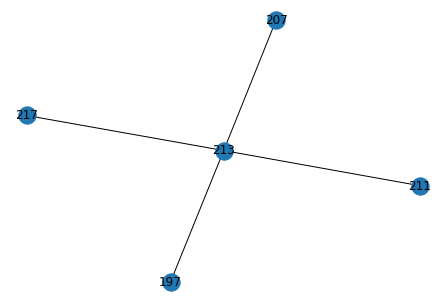

match_branches = [[207, 213], [211, 217]]
edges_to_delete (resolve crossover) = [[197, 207], [197, 211], [197, 213], [197, 217], [207, 211], [207, 217], [211, 213], [213, 217]]
edges_to_create (resolve crossover) = [[207, 213], [211, 217]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 229 because skeletal distance was 963.9785438474617 and threshold was 2500
skip_nodes = [229]
edges_to_delete (cut_limb_network) = [[197, 207], [197, 211], [197, 213], [197, 217], [207, 211], [207, 217], [211, 213], [213, 217]]
edges_to_create = [[207, 213], [211, 217]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 10

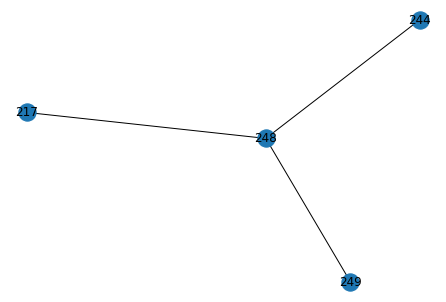

match_branches = []
edges_to_delete (resolve crossover) = [[217, 244], [217, 248], [217, 249], [244, 248], [244, 249], [248, 249]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[197, 207], [197, 211], [197, 213], [197, 217], [207, 211], [207, 217], [211, 213], [213, 217]]
Skipping endnode 229 because skeletal distance was 963.9785438474617 and threshold was 2500
skip_nodes = [229]
edges_to_delete (cut_limb_network) = [[217, 244], [217, 248], [217, 249], [244, 248], [244, 249], [248, 249]]
edges_to_create = []
Number of connected components = 8
Comp 0 = {256, 194, 235, 220, 248, 252, 253, 254, 255}
Comp 1 = {217, 211, 209, 203}
Comp 2 = {265, 266, 142, 273, 274, 279, 280, 287, 289, 290, 292, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304, 306, 307, 196, 244}
Comp 3 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,

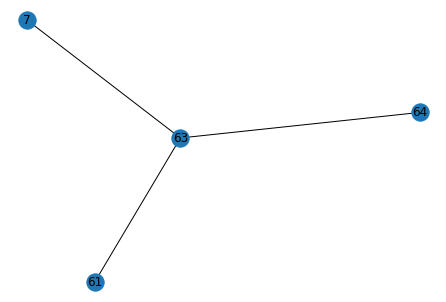

match_branches = [[7, 61]]
edges_to_delete (resolve crossover) = [[7, 63], [7, 64], [61, 63], [61, 64], [63, 64]]
edges_to_create (resolve crossover) = [[7, 61]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 37 because skeletal distance was 1426.1618477626441 and threshold was 2500
skip_nodes = [37]
edges_to_delete (cut_limb_network) = [[7, 63], [7, 64], [61, 63], [61, 64], [63, 64]]
edges_to_create = [[7, 61]]
Number of connected components = 3
Comp 0 = {2, 4, 7, 147, 148, 29, 45, 46, 52, 53, 54, 55, 59, 60, 61, 62, 74, 84, 88, 89, 90, 92, 95, 100, 113}
Comp 1 = {0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 56, 57, 58, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 91, 93, 94, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126

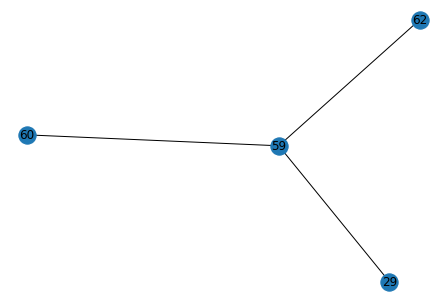

match_branches = [[60, 62]]
edges_to_delete (resolve crossover) = [[29, 59], [29, 60], [29, 62], [59, 60], [59, 62]]
edges_to_create (resolve crossover) = [[60, 62]]
curr_limb.deleted_edges 5 =[[7, 63], [7, 64], [61, 63], [61, 64], [63, 64]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[29, 59], [29, 60], [29, 62], [59, 60], [59, 62]]
edges_to_create = [[60, 62]]
Number of connected components = 5
Comp 0 = {2, 100, 7, 74, 45, 92, 113, 147, 148, 84, 88, 89, 90, 60, 61, 62, 95}
Comp 1 = {29}
Comp 2 = {4, 46, 52, 53, 54, 55, 59}
Comp 3 = {0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 56, 57, 58, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 91, 93, 94, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,

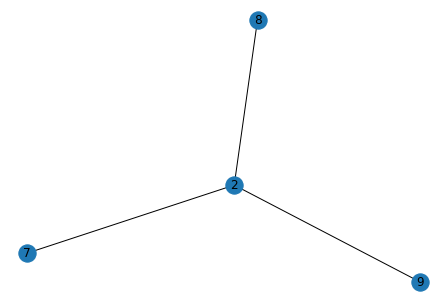

match_branches = [[2, 8], [7, 9]]
edges_to_delete (resolve crossover) = [[2, 7], [2, 9], [7, 8], [8, 9]]
edges_to_create (resolve crossover) = [[2, 8], [7, 9]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 7], [2, 9], [7, 8], [8, 9]]
edges_to_create = [[2, 8], [7, 9]]
Number of connected components = 2
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 9, 10, 11}
Comp 1 = {8, 2}
curr_limb_copy.deleted_edges = [[2, 7], [2, 9], [7, 8], [8, 9]]
curr_limb_copy.created_edges = [[2, 8], [7, 9]]
After get best cut: cut_edges = [[2, 7], [2, 9], [7, 8], [8, 9]], added_edges = [[2, 8], [7, 9]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  3,  4,  5,  6,  7,  9, 10, 11]), array([8, 2])]



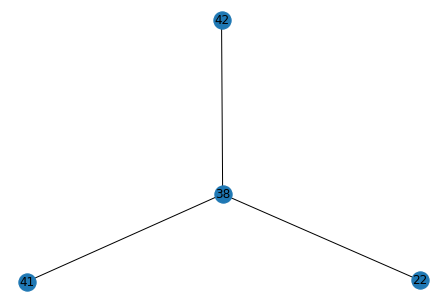

match_branches = []
edges_to_delete (resolve crossover) = [[22, 38], [22, 41], [22, 42], [38, 41], [38, 42], [41, 42]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 60 because skeletal distance was 2301.0061027372712 and threshold was 2500
skip_nodes = [60]
edges_to_delete (cut_limb_network) = [[22, 38], [22, 41], [22, 42], [38, 41], [38, 42], [41, 42]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28.0, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
Comp 1 = {22}
Comp 2 = {65, 66, 5, 7, 41, 43, 47, 48, 23, 57}
Comp 3 = {42}
curr_limb_copy.deleted_edges = [[22, 38], [22, 41], [22, 42], [38, 41], [38, 42], [41, 42]]
curr_limb_copy.created

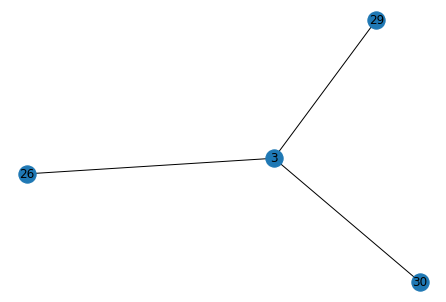

match_branches = [[3, 29], [26, 30]]
edges_to_delete (resolve crossover) = [[3, 26], [3, 30], [26, 29], [29, 30]]
edges_to_create (resolve crossover) = [[3, 29], [26, 30]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 6 because skeletal distance was 134.29668936649495 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[3, 26], [3, 30], [26, 29], [29, 30]]
edges_to_create = [[3, 29], [26, 30]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13.0, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37}
Comp 1 = {3, 29}
Comp 2 = {28}
Comp 3 = {38}
curr_limb_copy.deleted_edges = [[3, 26], [3, 30], [26, 29], [29, 30]]
curr_limb_copy.created_edges = [[3, 29], [26, 30]]
After get best cut: cut_edges = [[3, 26], [3, 30], [26, 29], [29, 30]], added_edges = [[3, 29], [26, 30]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the spli

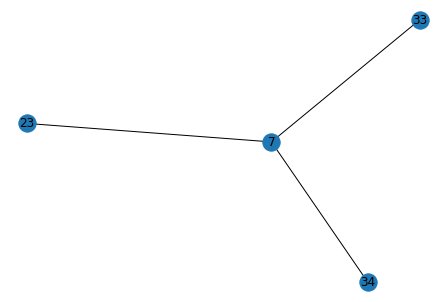

match_branches = [[23, 34], [7, 33]]
edges_to_delete (resolve crossover) = [[7, 23], [7, 34], [23, 33], [33, 34]]
edges_to_create (resolve crossover) = [[23, 34], [7, 33]]
curr_limb.deleted_edges 5 =[[3, 26], [3, 30], [26, 29], [29, 30]]
Skipping endnode 6 because skeletal distance was 134.29668936649495 and threshold was 2500
skip_nodes = [6]
edges_to_delete (cut_limb_network) = [[7, 23], [7, 34], [23, 33], [33, 34]]
edges_to_create = [[23, 34], [7, 33]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13.0, 14, 15, 16, 17, 18, 19, 20, 31, 32, 33}
Comp 1 = {34, 35, 36, 37, 10, 21, 22, 23, 24, 25, 26, 27, 30}
Comp 2 = {3, 29}
Comp 3 = {28}
Comp 4 = {38}
curr_limb_copy.deleted_edges = [[3, 26], [3, 30], [26, 29], [29, 30], [7, 23], [7, 34], [23, 33], [33, 34]]
curr_limb_copy.created_edges = [[3, 29], [26, 30], [23, 34], [7, 33]]
After get best cut: cut_edges = [[7, 23], [7, 34], [23, 33], [33, 34]], added_edges = [[23, 34], [7, 33]]
total_soma_paths_to_cut

  Edge: [ 9 11]: curr_angle = 154.44

Total time for doubling_back = 0.06545400619506836
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 9 11] had a doubling back of 154.43911722235052
***inside resolve crossover!!!!****
coordinate_branches = [9, 10, 11]
9 = red
10 = aqua
11 = purple
Angle between 9 and 10 = 21.0 
Angle between 9 and 11 = 96.66 
Angle between 10 and 11 = 64.21 
Final Matches = [[9, 10]]
matched_branches_revised = [[9, 10]]
Original graph


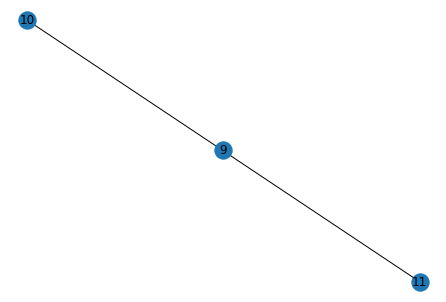

match_branches = [[9, 10]]
edges_to_delete (resolve crossover) = [[9, 11], [10, 11]]
edges_to_create (resolve crossover) = [[9, 10]]
edges_to_delete (cut_limb_network) = [array([ 9, 11]), array([10, 11])]
edges_to_create = [[9, 10]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 1 = {11}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11])]
curr_limb_copy.created_edges = [[9, 10]]
After get best cut: cut_edges = [array([ 9, 11]), array([10, 11])], added_edges = [[9, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid pa

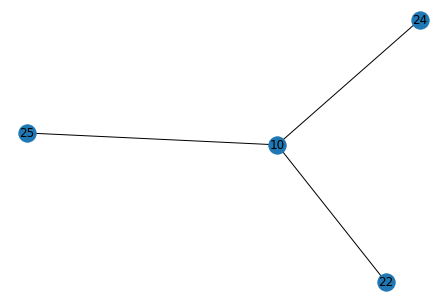

match_branches = [[10, 24]]
edges_to_delete (resolve crossover) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create (resolve crossover) = [[10, 24]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create = [[10, 24]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 17, 18, 19, 20, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 1 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 2 = {25}
Comp 3 = {11}
Comp 4 = {21}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
curr_limb_copy.created_edges = [[9, 10], [10, 24]]
After get best cut: cut_edges = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]], added_edges = [[10, 2

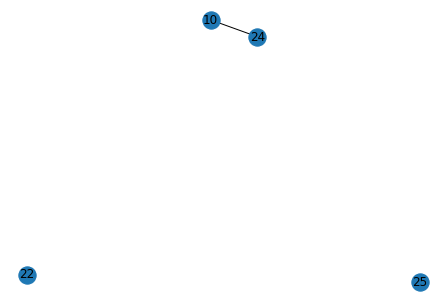

match_branches = [[10, 24]]
edges_to_delete (resolve crossover) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create (resolve crossover) = [[10, 24]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create = [[10, 24]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 17, 18, 19, 20, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 1 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 2 = {25}
Comp 3 = {11}
Comp 4 = {21}
Comp 5 = {47}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
curr_limb_copy.created_edges = [[9, 10], [10, 

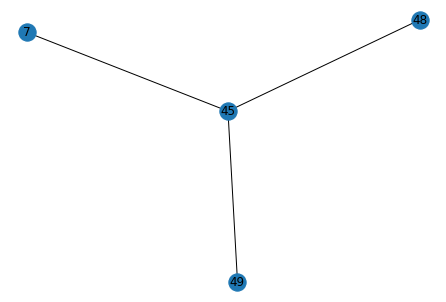

match_branches = [[45, 48]]
edges_to_delete (resolve crossover) = [[7, 45], [7, 48], [7, 49], [45, 49], [48, 49]]
edges_to_create (resolve crossover) = [[45, 48]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[7, 45], [7, 48], [7, 49], [45, 49], [48, 49]]
edges_to_create = [[45, 48]]
Number of connected components = 8
Comp 0 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 18, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 48}
Comp 1 = {5, 7, 8, 19, 20, 26, 46, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 2 = {49}
Comp 3 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 4 = {25}
Comp 5 = {11}
Comp 6 = {21}
Comp 7 = {47}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [2

  Edge: [ 9 10]: curr_angle = 8.04
  Edge: [10 24]: curr_angle = 6.87
  Edge: [24 29]: curr_angle = 24.49
  Edge: [29 32]: curr_angle = 10.38
  Edge: [32 33]: curr_angle = 19.67
  Edge: [33 31]: curr_angle = 11.21
  Edge: [31 36]: curr_angle = 16.91
  Edge: [36 35]: curr_angle = 28.18
  Edge: [35 38]: curr_angle = 7.58
  Edge: [38 40]: curr_angle = 11.39
  Edge: [40 45]: curr_angle = 14.26
  Edge: [45 48]: curr_angle = 4.14

Total time for doubling_back = 0.4842822551727295

Attempting the width jump check (attempting from both sides)
  Edge: [ 9 10]: jump = -22.12
  Edge: [10 24]: jump = 43.9
  Edge: [24 29]: jump = 3.21
  Edge: [29 32]: jump = 37.38
  Edge: [32 33]: jump = 38.25
  Edge: [33 31]: jump = -130.92
  Edge: [31 36]: jump = 34.61
  Edge: [36 35]: jump = 57.78
  Edge: [35 38]: jump = -53.37
  Edge: [38 40]: jump = 71.05
  Edge: [40 45]: jump = 46.56
  Edge: [45 48]: jump = 232.1
Adding error edge [45 48] because width jump was 232.09501913763734
Total time for width = 0.4362

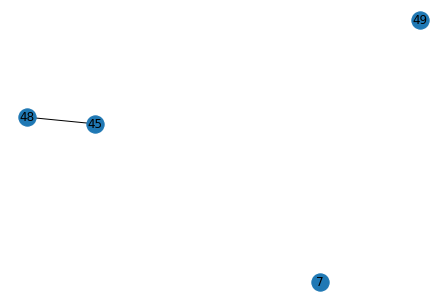

match_branches = [[45, 48]]
edges_to_delete (resolve crossover) = [[7, 45], [7, 48], [7, 49], [45, 49], [48, 49]]
edges_to_create (resolve crossover) = [[45, 48]]
Rejecting creating edge [45, 48] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 7, 45]), array([ 7, 48]), array([ 7, 49]), array([45, 48]), array([45, 49]), array([48, 49])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {48}
Comp 1 = {5, 7, 8, 19, 20, 26, 46, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 2 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 18, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45}
Comp 3 = {49}
Comp 4 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 5 = {25}
Comp 6 = {11}
Comp 7 = {21}
Comp 8 = {47}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [7, 45], [7, 4

  Edge: [ 9 10]: curr_angle = 8.04
  Edge: [10 24]: curr_angle = 6.87
  Edge: [24 29]: curr_angle = 24.49
  Edge: [29 32]: curr_angle = 10.38
  Edge: [32 33]: curr_angle = 19.67
  Edge: [33 31]: curr_angle = 11.21
  Edge: [31 36]: curr_angle = 16.91
  Edge: [36 35]: curr_angle = 28.18
  Edge: [35 38]: curr_angle = 7.58
  Edge: [38 40]: curr_angle = 11.39
  Edge: [40 45]: curr_angle = 14.26
  Edge: [45 48]: curr_angle = 4.14

Total time for doubling_back = 0.49248218536376953

Attempting the width jump check (attempting from both sides)
  Edge: [ 9 10]: jump = -22.12
  Edge: [10 24]: jump = 43.9
  Edge: [24 29]: jump = 3.21
  Edge: [29 32]: jump = 37.38
  Edge: [32 33]: jump = 38.25
  Edge: [33 31]: jump = -130.92
  Edge: [31 36]: jump = 34.61
  Edge: [36 35]: jump = 57.78
  Edge: [35 38]: jump = -53.37
  Edge: [38 40]: jump = 71.05
  Edge: [40 45]: jump = 46.56
  Edge: [45 48]: jump = 232.1
Adding error edge [45 48] because width jump was 232.09501913763734
Total time for width = 0.430

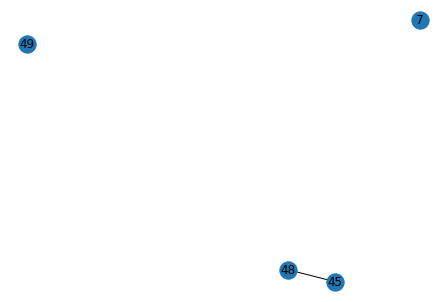

match_branches = [[45, 48]]
edges_to_delete (resolve crossover) = [[7, 45], [7, 48], [7, 49], [45, 49], [48, 49]]
edges_to_create (resolve crossover) = [[45, 48]]
Rejecting creating edge [45, 48] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 7, 45]), array([ 7, 48]), array([ 7, 49]), array([45, 48]), array([45, 49]), array([48, 49])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {48}
Comp 1 = {5, 7, 8, 19, 20, 26, 46, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 2 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 18, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45}
Comp 3 = {49}
Comp 4 = {43, 44, 12, 13, 16, 22, 23, 57, 58, 27}
Comp 5 = {25}
Comp 6 = {11}
Comp 7 = {21}
Comp 8 = {47}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [7, 45], [7, 4

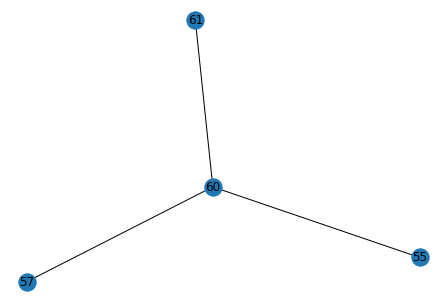

match_branches = [[55, 61], [57, 60]]
edges_to_delete (resolve crossover) = [[55, 57], [55, 60], [57, 61], [60, 61]]
edges_to_create (resolve crossover) = [[55, 61], [57, 60]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[55, 57], [55, 60], [57, 61], [60, 61]]
edges_to_create = [[55, 61], [57, 60]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}
Comp 1 = {61, 55}
curr_limb_copy.deleted_edges = [[55, 57], [55, 60], [57, 61], [60, 61]]
curr_limb_copy.created_edges = [[55, 61], [57, 60]]
After get best cut: cut_edges = [[55, 57], [55, 60], [57, 61], [60, 61]], added_edges = [[55, 61], [57, 60]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 

  Edge: [16 17]: curr_angle = 30.73
  Edge: [17 19]: curr_angle = 34.87
  Edge: [19 20]: curr_angle = 2.02
  Edge: [20 24]: curr_angle = 19.43
  Edge: [24 35]: curr_angle = 37.93
  Edge: [35 74]: curr_angle = 68.65
  Edge: [74 56]: curr_angle = 62.29
  Edge: [56 60]: curr_angle = 37.65
  Edge: [60 57]: curr_angle = 24.44
  Edge: [57 58]: curr_angle = 19.1
  Edge: [58 68]: curr_angle = 22.32
  Edge: [68 67]: curr_angle = 20.12
  Edge: [67 64]: curr_angle = 20.87
  Edge: [64 65]: curr_angle = 20.22

Total time for doubling_back = 2.4880363941192627

Attempting the width jump check (attempting from both sides)
  Edge: [16 17]: jump = -197.32
  Edge: [17 19]: jump = -199.05
  Edge: [19 20]: jump = 67.01
  Edge: [20 24]: jump = 39.28
  Edge: [24 35]: jump = -45.92
  Edge: [35 74]: jump = 117.15
  Edge: [74 56]: jump = 7.77
  Edge: [56 60]: jump = 93.21
  Edge: [60 57]: jump = -43.24
  Edge: [57 58]: jump = 150.54
  Edge: [58 68]: jump = 117.71
  Edge: [68 67]: jump = 13.27
  Edge: [67 64]: 

  Edge: [16 17]: curr_angle = 30.73
  Edge: [17 19]: curr_angle = 34.87
  Edge: [19 20]: curr_angle = 2.02
  Edge: [20 24]: curr_angle = 19.43
  Edge: [24 35]: curr_angle = 37.93
  Edge: [35 74]: curr_angle = 68.65
  Edge: [74 56]: curr_angle = 62.29
  Edge: [56 59]: curr_angle = 122.6
  Edge: [59 63]: curr_angle = 9.09
  Edge: [63 66]: curr_angle = 37.33

Total time for doubling_back = 1.2848052978515625
There were 1 edges that passed doubling back threshold of 100
Winning edge [56 59] had a doubling back of 122.60420803066833
***inside resolve crossover!!!!****
coordinate_branches = [56, 59, 60]
56 = red
59 = aqua
60 = purple
Angle between 56 and 59 = 107.92 
Angle between 56 and 60 = 45.21 
Angle between 59 and 60 = 27.07 
Final Matches = [[59, 60]]
matched_branches_revised = [[59, 60]]
Original graph


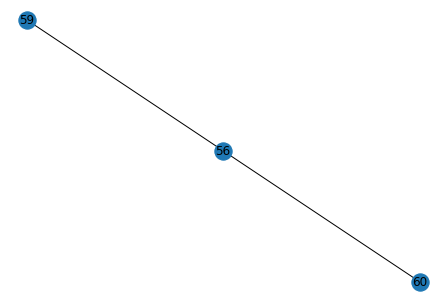

match_branches = [[59, 60]]
edges_to_delete (resolve crossover) = [[56, 59], [56, 60]]
edges_to_create (resolve crossover) = [[59, 60]]
edges_to_delete (cut_limb_network) = [array([56, 59]), array([56, 60])]
edges_to_create = [[59, 60]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 32, 33, 34, 35, 37, 38, 40, 43, 44, 47, 48, 49, 56, 74, 75}
Comp 1 = {27, 29, 30, 31, 36, 39, 41, 42, 45, 46, 50, 51, 52, 53, 54, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Comp 2 = {61, 55}
curr_limb_copy.deleted_edges = [[55, 57], [55, 60], [57, 61], [60, 61], array([56, 59]), array([56, 60])]
curr_limb_copy.created_edges = [[55, 61], [57, 60], [59, 60]]
After get best cut: cut_edges = [array([56, 59]), array([56, 60])], added_edges = [[59, 60]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIO

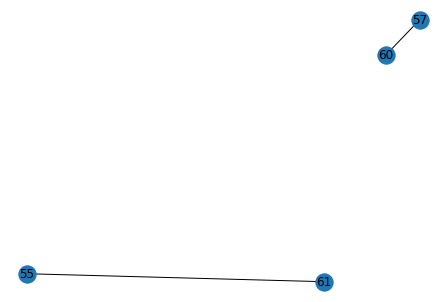

match_branches = [[55, 61], [57, 60]]
edges_to_delete (resolve crossover) = [[55, 57], [55, 60], [57, 61], [60, 61]]
edges_to_create (resolve crossover) = [[55, 61], [57, 60]]
curr_limb.deleted_edges 5 =[[55, 57], [55, 60], [57, 61], [60, 61], array([56, 59]), array([56, 60])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[55, 57], [55, 60], [57, 61], [60, 61]]
edges_to_create = [[55, 61], [57, 60]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 32, 33, 34, 35, 37, 38, 40, 43, 44, 47, 48, 49, 56, 74, 75}
Comp 1 = {27, 29, 30, 31, 36, 39, 41, 42, 45, 46, 50, 51, 52, 53, 54, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Comp 2 = {61, 55}
curr_limb_copy.deleted_edges = [[55, 57], [55, 60], [57, 61], [60, 61], array([56, 59]), array([56, 60]), [55, 57], [55, 60], [57, 61], [60, 61]]
curr_limb_copy.created_edges = [[55, 61], [57, 60], [59, 60], [55, 61], [57, 60]]
Af

  Edge: [65 64]: curr_angle = 20.22
  Edge: [64 67]: curr_angle = 20.87
  Edge: [67 68]: curr_angle = 20.12
  Edge: [68 58]: curr_angle = 22.32
  Edge: [58 57]: curr_angle = 19.1
  Edge: [57 60]: curr_angle = 24.44
  Edge: [60 59]: curr_angle = 25.72
  Edge: [59 63]: curr_angle = 9.09
  Edge: [63 66]: curr_angle = 37.33

Total time for doubling_back = 0.7882959842681885

Attempting the width jump check (attempting from both sides)
  Edge: [65 64]: jump = -126.55
  Edge: [64 67]: jump = -41.24
  Edge: [67 68]: jump = -13.27
  Edge: [68 58]: jump = -117.71
  Edge: [58 57]: jump = -150.54
  Edge: [57 60]: jump = 43.24
  Edge: [60 59]: jump = -101.46
  Edge: [59 63]: jump = -101.6
  Edge: [63 66]: jump = -23.16
Total time for width = 0.695777416229248
Path starting at 65 had err_edges: []
  Edge: [66 63]: jump = 23.16
  Edge: [63 59]: jump = 101.6
  Edge: [59 60]: jump = 101.46
  Edge: [60 57]: jump = -43.24
  Edge: [57 58]: jump = 150.54
  Edge: [58 68]: jump = 117.71
  Edge: [68 67]: jum

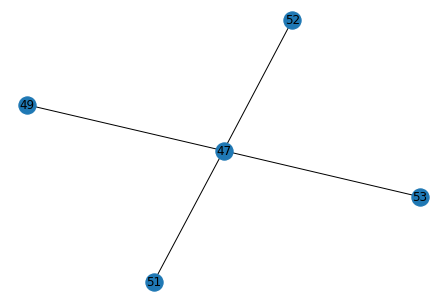

match_branches = []
edges_to_delete (resolve crossover) = [[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53]]
edges_to_create = []
Number of connected components = 6
Comp 0 = {0, 1, 4, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137}
Comp 1 = {2, 3, 5, 6, 71, 9, 10, 49, 

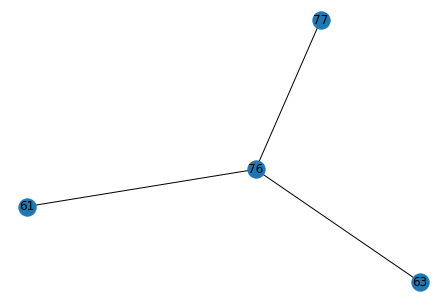

match_branches = [[63, 77]]
edges_to_delete (resolve crossover) = [[61, 63], [61, 76], [61, 77], [63, 76], [76, 77]]
edges_to_create (resolve crossover) = [[63, 77]]
curr_limb.deleted_edges 5 =[[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53]]
Skipping endnode 34 because skeletal distance was 490.650729373455 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[61, 63], [61, 76], [61, 77], [63, 76], [76, 77]]
edges_to_create = [[63, 77]]
Number of connected components = 8
Comp 0 = {1, 11, 12, 13, 15, 16, 19, 20, 21, 54, 66, 67, 68, 70, 73, 76, 80, 81, 82, 83, 85, 99, 102, 103, 107, 108}
Comp 1 = {61}
Comp 2 = {0, 4, 7, 8, 14, 17, 18, 22, 23, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 69, 72, 75, 77, 78, 79, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118

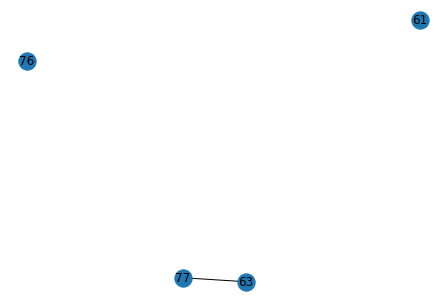

match_branches = [[63, 77]]
edges_to_delete (resolve crossover) = [[61, 63], [61, 76], [61, 77], [63, 76], [76, 77]]
edges_to_create (resolve crossover) = [[63, 77]]
curr_limb.deleted_edges 5 =[[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53], [61, 63], [61, 76], [61, 77], [63, 76], [76, 77]]
Skipping endnode 34 because skeletal distance was 490.650729373455 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[61, 63], [61, 76], [61, 77], [63, 76], [76, 77]]
edges_to_create = [[63, 77]]
Number of connected components = 8
Comp 0 = {1, 11, 12, 13, 15, 16, 19, 20, 21, 54, 66, 67, 68, 70, 73, 76, 80, 81, 82, 83, 85, 99, 102, 103, 107, 108}
Comp 1 = {61}
Comp 2 = {0, 4, 7, 8, 14, 17, 18, 22, 23, 25, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 69, 72, 75, 77, 78, 79, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 104, 105, 106

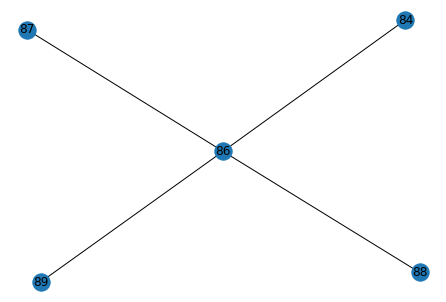

match_branches = []
edges_to_delete (resolve crossover) = [[84, 86], [84, 87], [84, 88], [84, 89], [86, 87], [86, 88], [86, 89], [87, 88], [87, 89], [88, 89]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[47, 49], [47, 51], [47, 52], [47, 53], [49, 51], [49, 52], [49, 53], [51, 52], [51, 53], [52, 53], [61, 63], [61, 76], [61, 77], [63, 76], [76, 77], [61, 63], [61, 76], [61, 77], [63, 76], [76, 77]]
Skipping endnode 34 because skeletal distance was 490.650729373455 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[84, 86], [84, 87], [84, 88], [84, 89], [86, 87], [86, 88], [86, 89], [87, 88], [87, 89], [88, 89]]
edges_to_create = []
Number of connected components = 12
Comp 0 = {1, 11, 12, 13, 15, 16, 19, 20, 21, 54, 66, 67, 68, 70, 73, 76, 80, 81, 82, 83, 85, 99, 102, 103, 107, 108}
Comp 1 = {61}
Comp 2 = {128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 0, 4, 7, 14, 17, 18, 22, 23, 25, 28, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 4

  Edge: [41 40]: curr_angle = 33.93
  Edge: [40 19]: curr_angle = 11.51
  Edge: [19 45]: curr_angle = 27.79
  Edge: [45 46]: curr_angle = 27.33

Total time for doubling_back = 1.152235746383667

Attempting the width jump check (attempting from both sides)
  Edge: [41 40]: jump = -173.33
  Edge: [40 19]: jump = -117.52
  Edge: [19 45]: jump = 165.62
  Edge: [45 46]: jump = 182.8
Total time for width = 1.1252357959747314
Path starting at 41 had err_edges: []
  Edge: [46 45]: jump = -182.8
  Edge: [45 19]: jump = -165.62
  Edge: [19 40]: jump = 117.52
  Edge: [40 41]: jump = 173.33
Total time for width = 0.9560799598693848
Path starting at 46 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}
curr_limb_copy.deleted_edges = []
curr_li

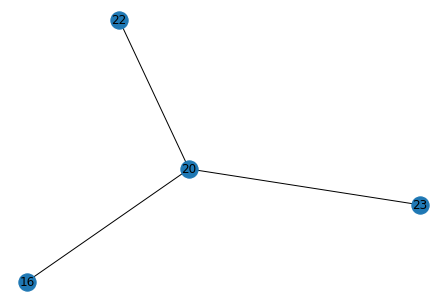

match_branches = [[20, 22], [16, 23]]
edges_to_delete (resolve crossover) = [[16, 20], [16, 22], [20, 23], [22, 23]]
edges_to_create (resolve crossover) = [[20, 22], [16, 23]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 31 because skeletal distance was 550.4929442609254 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[16, 20], [16, 22], [20, 23], [22, 23]]
edges_to_create = [[20, 22], [16, 23]]
Number of connected components = 2
Comp 0 = {5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 37, 40, 41, 43, 44, 45}
Comp 1 = {0, 33, 2, 3, 4, 1, 38, 39, 6, 42, 11, 20, 21, 22, 28}
curr_limb_copy.deleted_edges = [[16, 20], [16, 22], [20, 23], [22, 23]]
curr_limb_copy.created_edges = [[20, 22], [16, 23]]
After get best cut: cut_edges = [[16, 20], [16, 22], [20, 23], [22, 23]], added_edges = [[20, 22], [16, 23]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at

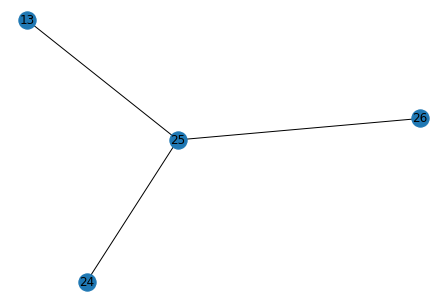

match_branches = [[13, 26], [24, 25]]
edges_to_delete (resolve crossover) = [[13, 24], [13, 25], [24, 26], [25, 26]]
edges_to_create (resolve crossover) = [[13, 26], [24, 25]]
curr_limb.deleted_edges 5 =[[16, 20], [16, 22], [20, 23], [22, 23]]
Skipping endnode 31 because skeletal distance was 550.4929442609254 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[13, 24], [13, 25], [24, 26], [25, 26]]
edges_to_create = [[13, 26], [24, 25]]
Number of connected components = 3
Comp 0 = {8, 9, 10, 13, 26, 27}
Comp 1 = {5, 7, 12, 14, 15, 16, 17, 18, 19, 23, 24, 25, 29, 30, 31, 32, 34, 35, 36, 37, 40, 41, 43, 44, 45}
Comp 2 = {0, 33, 2, 3, 4, 1, 38, 39, 6, 42, 11, 20, 21, 22, 28}
curr_limb_copy.deleted_edges = [[16, 20], [16, 22], [20, 23], [22, 23], [13, 24], [13, 25], [24, 26], [25, 26]]
curr_limb_copy.created_edges = [[20, 22], [16, 23], [13, 26], [24, 25]]
After get best cut: cut_edges = [[13, 24], [13, 25], [24, 26], [25, 26]], added_edges = [[13, 26], [24, 25]

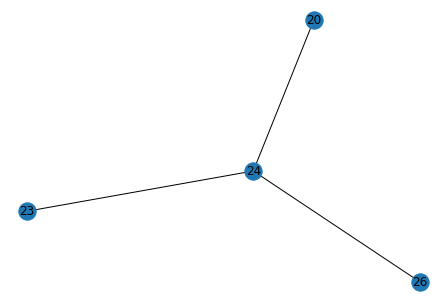

match_branches = [[20, 24]]
edges_to_delete (resolve crossover) = [[20, 23], [20, 26], [23, 24], [23, 26], [24, 26]]
edges_to_create (resolve crossover) = [[20, 24]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[20, 23], [20, 26], [23, 24], [23, 26], [24, 26]]
edges_to_create = [[20, 24]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 13, 14, 16, 18, 19, 20, 21, 23, 24}
Comp 1 = {33, 6, 10, 11, 12, 15, 17, 22, 26, 27, 28, 29, 30, 31}
Comp 2 = {25}
Comp 3 = {32}
curr_limb_copy.deleted_edges = [[20, 23], [20, 26], [23, 24], [23, 26], [24, 26]]
curr_limb_copy.created_edges = [[20, 24]]
After get best cut: cut_edges = [[20, 23], [20, 26], [23, 24], [23, 26], [24, 26]], added_edges = [[20, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so 

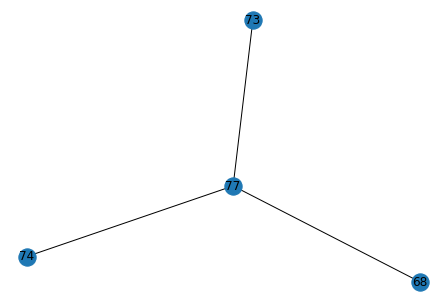

match_branches = [[68, 77]]
edges_to_delete (resolve crossover) = [[68, 73], [68, 74], [73, 74], [73, 77], [74, 77]]
edges_to_create (resolve crossover) = [[68, 77]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 77 because skeletal distance was 1954.7570870882898 and threshold was 2500
Skipping endnode 85 because skeletal distance was 1315.6046278829715 and threshold was 2500
skip_nodes = [77, 85]
edges_to_delete (cut_limb_network) = [[68, 73], [68, 74], [73, 74], [73, 77], [74, 77]]
edges_to_create = [[68, 77]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 77, 81, 84, 92, 93}
Comp 1 = {64, 71, 72, 73, 57}
Comp 2 = {34, 10, 74, 75, 78, 79, 80, 50, 83, 82, 85, 86, 88, 90, 91}
Comp 3 = {76}
Comp 4 = {87}
Comp 5 = {89}
curr_limb_copy.delet

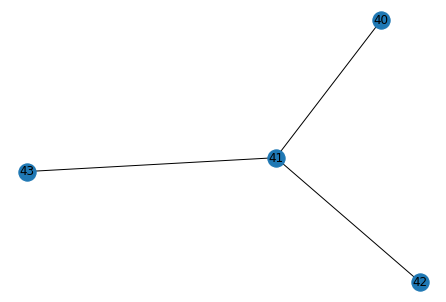

match_branches = [[41, 42]]
edges_to_delete (resolve crossover) = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43]]
edges_to_create (resolve crossover) = [[41, 42]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 73 because skeletal distance was 458.0416728392531 and threshold was 2500
skip_nodes = [73]
edges_to_delete (cut_limb_network) = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43]]
edges_to_create = [[41, 42]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83}
Comp 1 = {40}
Comp 2 = {43}
Comp 3 = {67}
curr_limb_copy.deleted_edges = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43]]
curr_limb_copy.created_edges = [[41, 42]]
After get best cut: cut_edges = [[40, 41], [40, 42], 

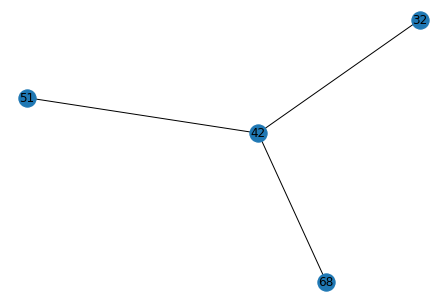

match_branches = []
edges_to_delete (resolve crossover) = [[32, 42], [32, 51], [32, 68], [42, 51], [42, 68], [51, 68]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[40, 41], [40, 42], [40, 43], [41, 43], [42, 43]]
Skipping endnode 73 because skeletal distance was 458.0416728392531 and threshold was 2500
skip_nodes = [73]
edges_to_delete (cut_limb_network) = [[32, 42], [32, 51], [32, 68], [42, 51], [42, 68], [51, 68]]
edges_to_create = []
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83}
Comp 1 = {40}
Comp 2 = {43}
Comp 3 = {32, 27, 22}
Comp 4 = {51}
Comp 5 = {68}
Comp 6 = {67}
curr_limb_copy.deleted_edges = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43], [32, 42], [32, 51], [

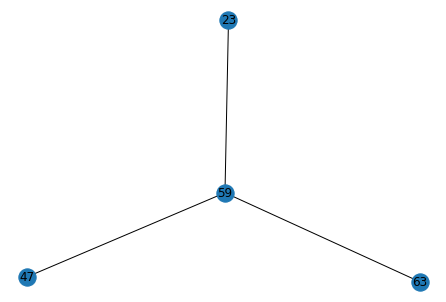

match_branches = [[23, 59]]
edges_to_delete (resolve crossover) = [[23, 47], [23, 63], [47, 59], [47, 63], [59, 63]]
edges_to_create (resolve crossover) = [[23, 59]]
curr_limb.deleted_edges 5 =[[40, 41], [40, 42], [40, 43], [41, 43], [42, 43], [32, 42], [32, 51], [32, 68], [42, 51], [42, 68], [51, 68]]
Skipping endnode 73 because skeletal distance was 458.0416728392531 and threshold was 2500
Skipping endnode 74 because skeletal distance was 276.6175491089258 and threshold was 2500
skip_nodes = [73, 74]
edges_to_delete (cut_limb_network) = [[23, 47], [23, 63], [47, 59], [47, 63], [59, 63]]
edges_to_create = [[23, 59]]
Number of connected components = 10
Comp 0 = {0, 1, 2, 6, 20, 21, 29, 33, 34, 35, 36, 37, 38, 39, 44, 45, 49, 50, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 65, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83}
Comp 1 = {3, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 23, 24, 26, 28, 31, 41, 42, 46, 48, 59, 64, 66, 73}
Comp 2 = {4, 5, 15, 16, 47, 25, 30}
Comp 3 = {40}
Comp 

  Edge: [70 69]: curr_angle = 59.76
  Edge: [69 60]: curr_angle = 36.38
  Edge: [60 62]: curr_angle = 109.45
  Edge: [62 61]: curr_angle = 146.02
  Edge: [61 75]: curr_angle = 12.31

Total time for doubling_back = 0.12609624862670898
There were 2 edges that passed doubling back threshold of 100
Winning edge [62 61] had a doubling back of 146.01679758776726
***inside resolve crossover!!!!****
coordinate_branches = [49, 61, 62]
49 = red
61 = aqua
62 = purple
Angle between 49 and 61 = 15.89 
Angle between 49 and 62 = 117.45 
Angle between 61 and 62 = 56.05 
Final Matches = [[49, 61]]
matched_branches_revised = [[49, 61]]
Original graph


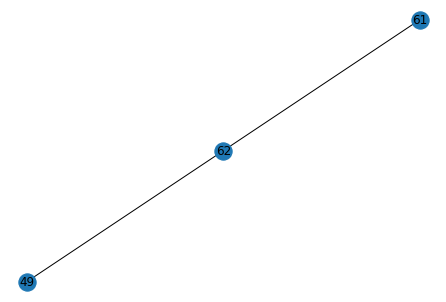

match_branches = [[49, 61]]
edges_to_delete (resolve crossover) = [[49, 62], [61, 62]]
edges_to_create (resolve crossover) = [[49, 61]]
edges_to_delete (cut_limb_network) = [array([49, 62]), array([61, 62])]
edges_to_create = [[49, 61]]
Number of connected components = 11
Comp 0 = {6, 21, 29, 37, 38, 44, 45, 52, 53, 54, 55, 56, 57, 60, 62, 63, 65, 69, 70, 71, 72, 74, 77, 78, 79}
Comp 1 = {3, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 23, 24, 26, 28, 31, 41, 42, 46, 48, 59, 64, 66, 73}
Comp 2 = {4, 5, 15, 16, 47, 25, 30}
Comp 3 = {0, 33, 34, 2, 1, 35, 36, 39, 75, 76, 80, 49, 50, 81, 82, 83, 20, 61}
Comp 4 = {40}
Comp 5 = {43}
Comp 6 = {32, 27, 22}
Comp 7 = {51}
Comp 8 = {68}
Comp 9 = {58}
Comp 10 = {67}
curr_limb_copy.deleted_edges = [[40, 41], [40, 42], [40, 43], [41, 43], [42, 43], [32, 42], [32, 51], [32, 68], [42, 51], [42, 68], [51, 68], [23, 47], [23, 63], [47, 59], [47, 63], [59, 63], array([49, 62]), array([61, 62])]
curr_limb_copy.created_edges = [[41, 42], [23, 59], [49, 61]]
Af

  Edge: [9 6]: curr_angle = 41.06
  Edge: [6 4]: curr_angle = 80.51
  Edge: [4 5]: curr_angle = 123.93
  Edge: [5 7]: curr_angle = 51.32
  Edge: [ 7 10]: curr_angle = 160.2

Total time for doubling_back = 0.3039734363555908
There were 2 edges that passed doubling back threshold of 100
Winning edge [ 7 10] had a doubling back of 160.20393013547016
***inside resolve crossover!!!!****
coordinate_branches = [3, 7, 10]
3 = red
7 = aqua
10 = purple
Angle between 3 and 7 = 121.46 
Angle between 3 and 10 = 28.85 
Angle between 7 and 10 = 31.73 
Final Matches = [[3, 10], [7, 10]]
matched_branches_revised = [[3, 10]]
Original graph


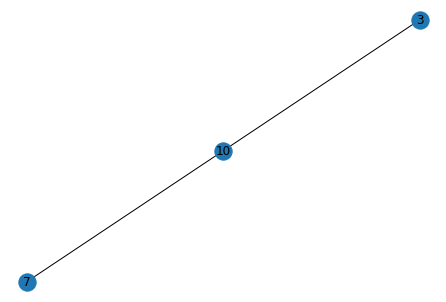

match_branches = [[3, 10]]
edges_to_delete (resolve crossover) = [[3, 7], [7, 10]]
edges_to_create (resolve crossover) = [[3, 10]]
edges_to_delete (cut_limb_network) = [array([3, 7]), array([ 7, 10])]
edges_to_create = [[3, 10]]
Number of connected components = 2
Comp 0 = {10, 3}
Comp 1 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12}
curr_limb_copy.deleted_edges = [array([3, 7]), array([ 7, 10])]
curr_limb_copy.created_edges = [[3, 10]]
After get best cut: cut_edges = [array([3, 7]), array([ 7, 10])], added_edges = [[3, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([10,  3]), array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11, 12])]


 ------ Total time for Splitting 864691135385207893 = 48.21478843688965 ------


----

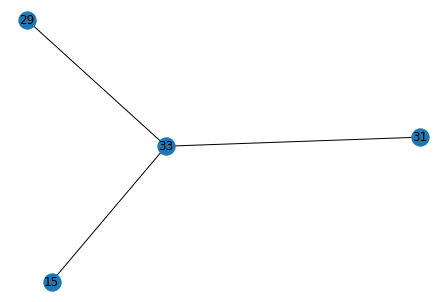

match_branches = [[29, 31], [15, 33]]
edges_to_delete (resolve crossover) = [[15, 29], [15, 31], [29, 33], [31, 33]]
edges_to_create (resolve crossover) = [[29, 31], [15, 33]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 29], [15, 31], [29, 33], [31, 33]]
edges_to_create = [[29, 31], [15, 33]]
Number of connected components = 2
Comp 0 = {1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 22, 26, 27, 28, 33, 36, 38, 39, 42, 45, 47, 48, 51, 53, 54, 55, 56, 57}
Comp 1 = {0, 6, 7, 18, 19, 21, 23, 24, 25, 29, 30, 31, 32, 34, 35, 37, 40, 41, 43, 44, 46, 49, 50, 52, 58, 59, 60, 61}
curr_limb_copy.deleted_edges = [[15, 29], [15, 31], [29, 33], [31, 33]]
curr_limb_copy.created_edges = [[29, 31], [15, 33]]
After get best cut: cut_edges = [[15, 29], [15, 31], [29, 33], [31, 33]], added_edges = [[29, 31], [15, 33]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE 

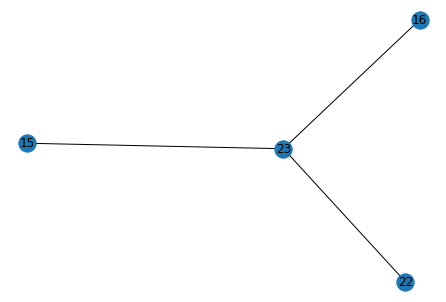

match_branches = [[16, 23]]
edges_to_delete (resolve crossover) = [[15, 16], [15, 22], [15, 23], [16, 22], [22, 23]]
edges_to_create (resolve crossover) = [[16, 23]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[15, 16], [15, 22], [15, 23], [16, 22], [22, 23]]
edges_to_create = [[16, 23]]
Number of connected components = 4
Comp 0 = {1, 30, 22}
Comp 1 = {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36}
Comp 2 = {20}
Comp 3 = {25}
curr_limb_copy.deleted_edges = [[15, 16], [15, 22], [15, 23], [16, 22], [22, 23]]
curr_limb_copy.created_edges = [[16, 23]]
After get best cut: cut_edges = [[15, 16], [15, 22], [15, 23], [16, 22], [22, 23]], added_edges = [[16, 23]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No va

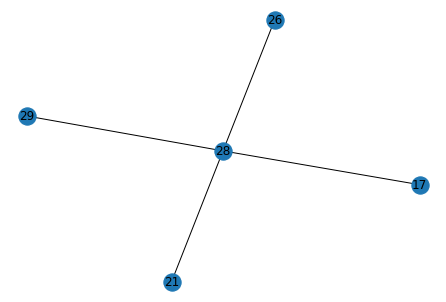

match_branches = [[17, 29], [21, 28]]
edges_to_delete (resolve crossover) = [[17, 21], [17, 26], [17, 28], [21, 26], [21, 29], [26, 28], [26, 29], [28, 29]]
edges_to_create (resolve crossover) = [[17, 29], [21, 28]]
curr_limb.deleted_edges 5 =[[15, 16], [15, 22], [15, 23], [16, 22], [22, 23]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[17, 21], [17, 26], [17, 28], [21, 26], [21, 29], [26, 28], [26, 29], [28, 29]]
edges_to_create = [[17, 29], [21, 28]]
Number of connected components = 6
Comp 0 = {1, 30, 22}
Comp 1 = {6, 8, 9, 10, 11, 12, 14, 15, 16, 23, 26, 31}
Comp 2 = {32, 0, 2, 34, 3, 33, 4, 5, 7, 35, 36, 13, 17, 29}
Comp 3 = {18, 19, 21, 24, 27, 28}
Comp 4 = {20}
Comp 5 = {25}
curr_limb_copy.deleted_edges = [[15, 16], [15, 22], [15, 23], [16, 22], [22, 23], [17, 21], [17, 26], [17, 28], [21, 26], [21, 29], [26, 28], [26, 29], [28, 29]]
curr_limb_copy.created_edges = [[16, 23], [17, 29], [21, 28]]
After get best cut: cut_edges = [[17, 21], [17, 26], [17, 28], [21, 26], [21

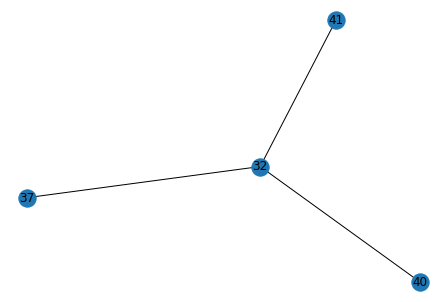

match_branches = [[32, 40], [37, 41]]
edges_to_delete (resolve crossover) = [[32, 37], [32, 41], [37, 40], [40, 41]]
edges_to_create (resolve crossover) = [[32, 40], [37, 41]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[32, 37], [32, 41], [37, 40], [40, 41]]
edges_to_create = [[32, 40], [37, 41]]
Number of connected components = 4
Comp 0 = {0, 2, 37, 41, 14, 48, 49, 50, 17, 51, 22, 25}
Comp 1 = {1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 39, 40, 42, 43, 44, 45, 46, 47, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}
Comp 2 = {35}
Comp 3 = {38}
curr_limb_copy.deleted_edges = [[32, 37], [32, 41], [37, 40], [40, 41]]
curr_limb_copy.created_edges = [[32, 40], [37, 41]]
After get best cut: cut_edges = [[32, 37], [32, 41], [37, 40], [40, 41]], added_edges = [[32, 40], [37, 41]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total numb

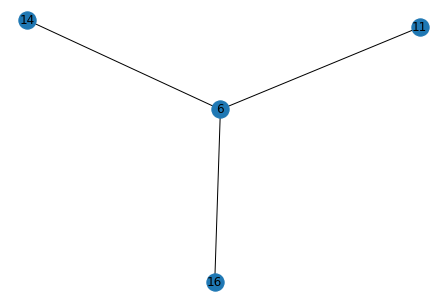

match_branches = [[6, 14], [11, 16]]
edges_to_delete (resolve crossover) = [[6, 11], [6, 16], [11, 14], [14, 16]]
edges_to_create (resolve crossover) = [[6, 14], [11, 16]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 11], [6, 16], [11, 14], [14, 16]]
edges_to_create = [[6, 14], [11, 16]]
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14}
Comp 1 = {0, 16, 10, 11}
Comp 2 = {15}
curr_limb_copy.deleted_edges = [[6, 11], [6, 16], [11, 14], [14, 16]]
curr_limb_copy.created_edges = [[6, 14], [11, 16]]
After get best cut: cut_edges = [[6, 11], [6, 16], [11, 14], [14, 16]], added_edges = [[6, 14], [11, 16]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 

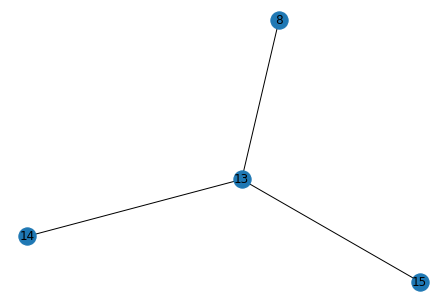

match_branches = [[8, 14], [13, 15]]
edges_to_delete (resolve crossover) = [[8, 13], [8, 15], [13, 14], [14, 15]]
edges_to_create (resolve crossover) = [[8, 14], [13, 15]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 11 because skeletal distance was 2371.7947647957553 and threshold was 2500
skip_nodes = [11]
edges_to_delete (cut_limb_network) = [[8, 13], [8, 15], [13, 14], [14, 15]]
edges_to_create = [[8, 14], [13, 15]]
Number of connected components = 2
Comp 0 = {0, 1, 4, 5, 6, 9, 10, 12, 13, 15, 16, 17}
Comp 1 = {2, 3, 7, 8, 11, 14}
curr_limb_copy.deleted_edges = [[8, 13], [8, 15], [13, 14], [14, 15]]
curr_limb_copy.created_edges = [[8, 14], [13, 15]]
After get best cut: cut_edges = [[8, 13], [8, 15], [13, 14], [14, 15]], added_edges = [[8, 14], [13, 15]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid p

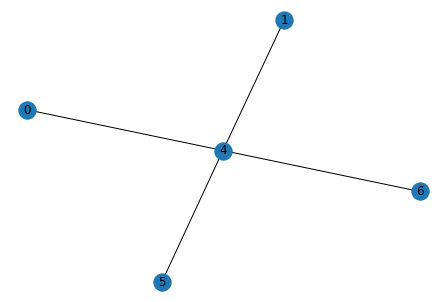

match_branches = [[0, 4], [1, 6]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 5], [0, 6], [1, 4], [1, 5], [4, 5], [4, 6], [5, 6]]
edges_to_create (resolve crossover) = [[0, 4], [1, 6]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 5], [0, 6], [1, 4], [1, 5], [4, 5], [4, 6], [5, 6]]
edges_to_create = [[0, 4], [1, 6]]
Number of connected components = 5
Comp 0 = {1, 6, 8, 9, 10, 12, 13, 14}
Comp 1 = {0, 11, 4, 7}
Comp 2 = {5}
Comp 3 = {2}
Comp 4 = {3}
curr_limb_copy.deleted_edges = [[0, 1], [0, 5], [0, 6], [1, 4], [1, 5], [4, 5], [4, 6], [5, 6]]
curr_limb_copy.created_edges = [[0, 4], [1, 6]]
After get best cut: cut_edges = [[0, 1], [0, 5], [0, 6], [1, 4], [1, 5], [4, 5], [4, 6], [5, 6]], added_edges = [[0, 4], [1, 6]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL =

  Edge: [52 46]: curr_angle = 27.83
  Edge: [46 39]: curr_angle = 52.78
  Edge: [39 38]: curr_angle = 34.64
  Edge: [38 40]: curr_angle = 35.05
  Edge: [40 66]: curr_angle = 17.04
  Edge: [66 62]: curr_angle = 49.01
  Edge: [62 63]: curr_angle = 96.89
  Edge: [63 61]: curr_angle = 106.13
  Edge: [61 19]: curr_angle = 16.23
  Edge: [19 20]: curr_angle = 167.7
  Edge: [20 56]: curr_angle = 51.85
  Edge: [56 65]: curr_angle = 34.05
  Edge: [65 79]: curr_angle = 36.47
  Edge: [79 81]: curr_angle = 33.55
  Edge: [81 86]: curr_angle = 19.19
  Edge: [86 82]: curr_angle = 0.54

Total time for doubling_back = 0.8659591674804688
There were 2 edges that passed doubling back threshold of 100
Winning edge [19 20] had a doubling back of 167.69619994709106
***inside resolve crossover!!!!****
coordinate_branches = [16, 19, 20]
16 = red
19 = aqua
20 = purple
Angle between 16 and 19 = 37.4 
Angle between 16 and 20 = 7.68 
Angle between 19 and 20 = 142.99 
Final Matches = [[16, 20]]
matched_branches_revi

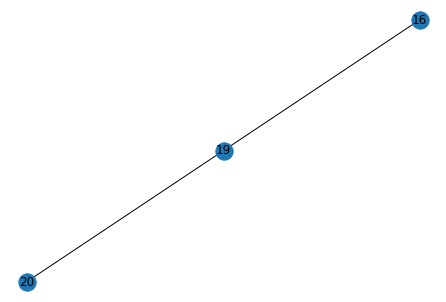

match_branches = [[16, 20]]
edges_to_delete (resolve crossover) = [[16, 19], [19, 20]]
edges_to_create (resolve crossover) = [[16, 20]]
edges_to_delete (cut_limb_network) = [array([16, 19]), array([19, 20])]
edges_to_create = [[16, 20]]
Number of connected components = 2
Comp 0 = {1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 19, 22, 23, 25, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 91, 92, 93, 94, 97, 98, 99, 102, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122}
Comp 1 = {0, 3, 11, 15, 16, 20, 21, 24, 26, 32, 33, 43, 54, 55, 56, 65, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 95, 96, 100, 101, 103, 104, 105, 106, 107, 108}
curr_limb_copy.deleted_edges = [array([16, 19]), array([19, 20])]
curr_limb_copy.created_edges = [[16, 20]]
After get best cut: cut_edges = [array([16, 19]), array([19, 20])], added_edges = [[16, 20]]
to

  Edge: [52 46]: curr_angle = 27.83
  Edge: [46 39]: curr_angle = 52.78
  Edge: [39 38]: curr_angle = 34.64
  Edge: [38 40]: curr_angle = 35.05
  Edge: [40 66]: curr_angle = 17.04
  Edge: [66 62]: curr_angle = 49.01
  Edge: [62 63]: curr_angle = 96.89
  Edge: [63 70]: curr_angle = 74.97
  Edge: [70 98]: curr_angle = 52.64
  Edge: [ 98 102]: curr_angle = 9.27
  Edge: [102 116]: curr_angle = 18.66
  Edge: [116 117]: curr_angle = 9.83
  Edge: [117 121]: curr_angle = 17.6
  Edge: [121 122]: curr_angle = 2.82

Total time for doubling_back = 0.8531002998352051

Attempting the width jump check (attempting from both sides)
  Edge: [52 46]: jump = -197.09
  Edge: [46 39]: jump = -257.97
  Edge: [39 38]: jump = -191.74
  Edge: [38 40]: jump = 8.83
  Edge: [40 66]: jump = -79.09
  Edge: [66 62]: jump = -458.66
  Edge: [62 63]: jump = -61.18
  Edge: [63 70]: jump = 307.6
Adding error edge [63 70] because width jump was 307.60471015589064
  Edge: [70 98]: jump = 67.89
  Edge: [ 98 102]: jump = -77.

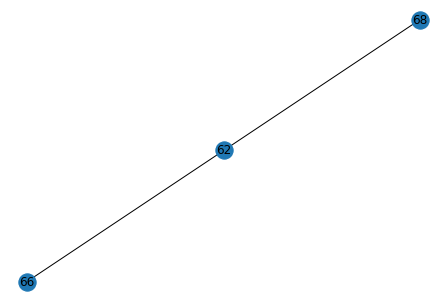

match_branches = [[66, 68]]
edges_to_delete (resolve crossover) = [[62, 66], [62, 68]]
edges_to_create (resolve crossover) = [[66, 68]]
edges_to_delete (cut_limb_network) = [array([62, 66]), array([62, 68])]
edges_to_create = [[66, 68]]
Number of connected components = 3
Comp 0 = {1, 2, 4, 5, 6, 9, 10, 12, 13, 14, 18, 22, 25, 27, 28, 29, 30, 31, 34, 35, 37, 38, 39, 40, 41, 42, 45, 46, 48, 50, 51, 52, 53, 58, 59, 64, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 93, 94}
Comp 1 = {7, 8, 17, 19, 23, 36, 44, 47, 49, 57, 60, 61, 62, 63, 70, 91, 92, 97, 98, 99, 102, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122}
Comp 2 = {0, 3, 11, 15, 16, 20, 21, 24, 26, 32, 33, 43, 54, 55, 56, 65, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 95, 96, 100, 101, 103, 104, 105, 106, 107, 108}
curr_limb_copy.deleted_edges = [array([16, 19]), array([19, 20]), array([62, 66]), array([62, 68])]
curr_limb_copy.created_edges = [[16, 20], [66, 68]]
After get best cut: cut_edges = [array([6

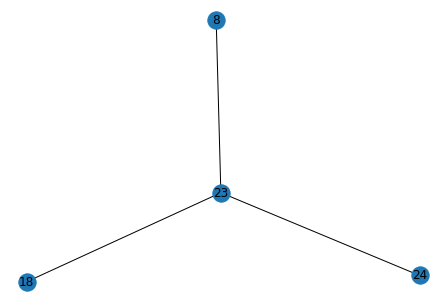

match_branches = []
edges_to_delete (resolve crossover) = [[8, 18], [8, 23], [8, 24], [18, 23], [18, 24], [23, 24]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 9 because skeletal distance was 1177.1589272384801 and threshold was 2500
skip_nodes = [9]
edges_to_delete (cut_limb_network) = [[8, 18], [8, 23], [8, 24], [18, 23], [18, 24], [23, 24]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32}
Comp 1 = {8}
Comp 2 = {17, 18, 12}
Comp 3 = {33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 19, 24}
Comp 4 = {22}
curr_limb_copy.deleted_edges = [[8, 18], [8, 23], [8, 24], [18, 23], [18, 24], [23, 24]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[8, 18], [8, 23], [8, 24], [18, 23], [18, 24], [23, 24]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at 

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")